# **PHASE I - EXPLORATION AND UNDERSTANDING**

Aim : To understand the data, structure, quality, and relationships.

## **1. LOAD AND VIEW DATA**

In [ ]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
!pip install missingno
import missingno as msno
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.stats import chi2_contingency
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# List drive content
os.listdir('/content/drive/MyDrive')

['LC_loans_granting_model_dataset.csv',
 'Colab Notebooks',
 'processed_loan_data.csv',
 'processed_loan_data.parquet',
 'LCDataDictionary.xlsx',
 'NOTE2.ipynb',
 'loan_2019_2020.csv',
 'loan_2019_2020_filtered.csv',
 'loan_2019_2020_final.csv',
 'Portfolio - Bertie Dickinson.ipynb',
 'd1_cleaned.csv',
 'categorical_variable_plots.png',
 'categorical_default_non_default_rate_plots.png',
 'Default_Rate_Of_Categorical_variable.png',
 'numerical_density_plots_by_default.png',
 'Categorical_Default_non_Default_Count.png',
 'Numerical_density_plots_by_default.png',
 'FE_data.csv',
 'Feature_Engineering_data.csv',
 'processed_dataset.xls',
 'Categorical_Default_non_Default_Rate.png',
 'PHASE_2_data.csv',
 'project_data',
 'Phase_2_data_splits',
 'Phase_2_data_preprocessed',
 'Phase_2_data_preprocessed_csv',
 'Phase_2_models',
 'sd_30.csv',
 'P1_data.csv',
 'Innitial Data Cleaning.ipynb',
 'First.ipynb']

In [ ]:
# Read the CSV file into a pandas DataFrame.
data = pd.read_csv('/content/drive/MyDrive/P1_data.csv', low_memory=False) # low_memory=False is used to suppress the DtypeWarning for mixed data types.

In [ ]:
# view data
data

loan_amnt        term int_rate  installment grade sub_grade  \
0         12075.0   60 months   18.55%       310.25     E        E2   
1          4000.0   36 months    8.19%       125.70     A        A4   
2         25000.0   36 months    6.24%       763.28     A        A2   
3         16000.0   36 months   19.42%       589.90     D        D3   
4         10000.0   36 months    7.69%       311.94     A        A4   
...           ...         ...      ...          ...   ...       ...   
318988    30575.0   36 months   23.88%      1197.62     E        E2   
318989    18000.0   36 months   15.31%       626.72     C        C2   
318990    25000.0   36 months   13.11%       843.68     B        B4   
318991    16500.0   60 months   19.03%       428.30     D        D3   
318992    10000.0   36 months   12.62%       335.12     C        C1   

                                   emp_title emp_length home_ownership  \
0                          Credit specialist  10+ years           RENT   
1                  Web Application Developer    2 years           RENT   
2                                  Architect  10+ years       MORTGAGE   
3       Assistant Director IT Infrastructure  10+ years       MORTGAGE   
4                        SR.Sales consultant    4 years           RENT   
...                                      ...        ...            ...   
318988                            X-Ray Tech  10+ years       MORTGAGE   
318989        The Lakes Retirement Community    3 years       MORTGAGE   
318990     Parkland Health & Hospital System    7 years       MORTGAGE   
318991                     Warehouse Manager    3 years           RENT   
318992                                   NaN        NaN            OWN   

        annual_inc  ... num_op_rev_tl num_rev_accts pct_tl_nvr_dlq  \
0          42000.0  ...          11.0          23.0          100.0   
1          73480.0  ...           2.0           2.0          100.0   
2         135000.0  ...          10.0          16.0          100.0   
3         116000.0  ...          24.0          28.0          100.0   
4          97000.0  ...          11.0          28.0           81.1   
...            ...  ...           ...           ...            ...   
318988     80000.0  ...           2.0           5.0          100.0   
318989     98000.0  ...           NaN           NaN            NaN   
318990    102000.0  ...           4.0           7.0          100.0   
318991     60000.0  ...           3.0          10.0          100.0   
318992     60000.0  ...           7.0           9.0          100.0   

       percent_bc_gt_75  pub_rec_bankruptcies  tot_hi_cred_lim  \
0                  60.0                   0.0          38200.0   
1                   NaN                   1.0          50486.0   
2                  33.3                   0.0         410570.0   
3                  54.5                   0.0         286847.0   
4                   0.0                   0.0          36848.0   
...                 ...                   ...              ...   
318988            100.0                   1.0          78514.0   
318989            100.0                   0.0              NaN   
318990             66.7                   0.0         149368.0   
318991             33.3                   0.0          31000.0   
318992              0.0                   0.0          86624.0   

       total_bal_ex_mort  total_bc_limit  total_il_high_credit_limit  default  
0                20525.0         12500.0                     12000.0        0  
1                30994.0             0.0                     45886.0        0  
2                68538.0         41900.0                     51552.0        0  
3               107500.0         21500.0                    109138.0        0  
4                10390.0         21700.0                      9548.0        0  
...                  ...             ...                         ...      ...  
318988           54297.0          5000.0                     72514.0    

### **i. Shape of Data**

In [ ]:
# Check number of rows and columns
data.shape

(318993, 47)

### **ii. Data types of Variables in Data**

In [ ]:
data.dtypes

loan_amnt                     float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
purpose                        object
title                          object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
fico_range_low                float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                     object
total_acc                     float64
application_type               object
total_rev_hi_lim              float64
acc_open_past_24mths          float64
mo_sin_old_il_acct            float64
mo_sin_old_rev_tl_op          float64
mo_sin_rcnt_rev_tl_op         float64
mo_sin_rcnt_tl                float64
mort_acc                      float64
mths_since_recent_bc          float64
num_actv_bc_tl                float64
num_actv_rev_tl               float64
num_bc_tl                     float64
num_il_tl                     float64
num_op_rev_tl                 float64
num_rev_accts                 float64
pct_tl_nvr_dlq                float64
percent_bc_gt_75              float64
pub_rec_bankruptcies          float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
default                         int64
dtype: object

***OBSERVATON***

earliest_cr_line need to be converted to datetime format.

Term will me changed to interger

revol_util and int_rate need to be converted to floats.

Will convert variables like loan_amount and more to intergers once missing values have been handled.

In [ ]:
# Select numerical columns (integers and floats)
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical Columns (Integers and Floats):")
print(numerical_cols)

Numerical Columns (Integers and Floats):
['loan_amnt', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'total_rev_hi_lim', 'acc_open_past_24mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'default']


In [ ]:
# Select categorical columns (object and category dtypes)
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical Columns:")
print(categorical_cols)

Categorical Columns:
['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'title', 'addr_state', 'earliest_cr_line', 'revol_util', 'application_type']


In [ ]:
# Convert to numeric types, cleaning up percentages and dollar signs
nc_cols = ['loan_amnt', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
                'fico_range_low', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
                'total_acc', 'total_rev_hi_lim', 'acc_open_past_24mths', 'mo_sin_old_il_acct',
                'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
                'mths_since_recent_bc', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_tl', 'num_il_tl',
                'num_op_rev_tl', 'num_rev_accts', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
                'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'default']

for col in nc_cols:
    # Remove commas and dollar signs if present
    data[col] = data[col].astype(str).str.replace(r'[$,]', '', regex=True)
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Remove percentage signs and convert to float for 'int_rate' and 'revol_util'
percentage_cols = ['int_rate', 'revol_util']
for col in percentage_cols:
    data[col] = data[col].astype(str).str.replace('%', '', regex=False)
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Convert date columns to datetime objects
date_cols = ['earliest_cr_line']
for col in date_cols:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Convert 'term' to integer
data['term'] = data['term'].astype(str).str.replace(' months', '', regex=False).astype(int)


# Clean up spaces in string columns
string_cols = ['grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'title', 'addr_state', 'application_type']

for col in string_cols:
    data[col] = data[col].astype(str).str.strip()

# Display the updated data types
display(data.dtypes)

/tmp/ipython-input-2846149533.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce')


loan_amnt                            float64
term                                   int64
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_title                             object
emp_length                            object
home_ownership                        object
annual_inc                           float64
verification_status                   object
purpose                               object
title                                 object
addr_state                            object
dti                                  float64
delinq_2yrs                          float64
earliest_cr_line              datetime64[ns]
fico_range_low                       float64
inq_last_6mths                       float64
open_acc                             float64
pub_rec                              float64
revol_bal                            float64
revol_util                           float64
total_acc                            float64
application_type                      object
total_rev_hi_lim                     float64
acc_open_past_24mths                 float64
mo_sin_old_il_acct                   float64
mo_sin_old_rev_tl_op                 float64
mo_sin_rcnt_rev_tl_op                float64
mo_sin_rcnt_tl                       float64
mort_acc                             float64
mths_since_recent_bc                 float64
num_actv_bc_tl                       float64
num_actv_rev_tl                      float64
num_bc_tl                            float64
num_il_tl                            float64
num_op_rev_tl                        float64
num_rev_accts                        float64
pct_tl_nvr_dlq                       float64
percent_bc_gt_75                     float64
pub_rec_bankruptcies                 float64
tot_hi_cred_lim                      float64
total_bal_ex_mort                    float64
total_bc_limit                       float64
total_il_high_credit_limit           float64
default                                int64
dtype: object

_

## **2. INSPECT DATA QUALITY**

### **i. Duplicates**

In [ ]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


For duplicated columns, I counted manually from variables listed in data.dtypes and ensured the number was consistent with that given by data.shape. This was faster. There are no duplicated columns.

### **ii. Unique Values and Inconsistent Entries**

In [ ]:
# Check unique counts in each column
for col in data.columns:
    print(f"Value counts for column: {col}")
    print(data[col].value_counts())
    print("\n" + "="*50 + "\n")

Value counts for column: loan_amnt
loan_amnt
10000.0    25734
20000.0    17688
15000.0    16876
12000.0    16746
5000.0     11553
           ...  
37425.0        1
35225.0        1
38100.0        1
39525.0        1
37150.0        1
Name: count, Length: 1514, dtype: int64


Value counts for column: term
term
36    233079
60     85914
Name: count, dtype: int64


Value counts for column: int_rate
int_rate
11.99    7109
10.99    7032
15.61    5087
9.17     4791
12.99    4756
         ... 
27.99       1
22.85       1
14.38       1
19.16       1
15.76       1
Name: count, Length: 602, dtype: int64


Value counts for column: installment
installment
332.10    600
327.34    600
318.79    400
491.01    394
361.38    393
         ... 
256.05      1
225.27      1
149.69      1
364.28      1
710.61      1
Name: count, Length: 51711, dtype: int64


Value counts for column: grade
grade
B    92543
C    86630
A    62283
D    49760
E    19993
F     5994
G     1790
Name: count, dtype: int64


Value count

In [ ]:
# Replace the string 'nan' in 'emp_length' with 'unknown'
data['emp_length'] = data['emp_length'].replace('nan', 'unknown')

# Verify the change by checking the value counts
print("Value counts for 'emp_length' after replacing 'nan' with 'unknown':")
print(data['emp_length'].value_counts())

Value counts for 'emp_length' after replacing 'nan' with 'unknown':
emp_length
10+ years    102547
2 years       28616
< 1 year      27531
3 years       25395
1 year        20799
5 years       20316
unknown       20088
4 years       19490
6 years       15393
7 years       14471
8 years       13341
9 years       11006
Name: count, dtype: int64


### **iii. Missing Values**

In [ ]:
# Check for missing values
print("\nMissing values per column:")
display(data.isnull().sum())


Missing values per column:


loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
purpose                           0
title                             0
addr_state                        0
dti                             275
delinq_2yrs                       0
earliest_cr_line                  0
fico_range_low                    0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      276
total_acc                         0
application_type                  0
total_rev_hi_lim              20126
acc_open_past_24mths          14039
mo_sin_old_il_acct            29528
mo_sin_old_rev_tl_op          20126
mo_sin_rcnt_rev_tl_op         20126
mo_sin_rcnt_tl                20126
mort_acc                      14039
mths_since_recent_bc          17340
num_actv_bc_tl                20126
num_actv_rev_tl               20126
num_bc_tl                     20126
num_il_tl                     20126
num_op_rev_tl                 20126
num_rev_accts                 20126
pct_tl_nvr_dlq                20172
percent_bc_gt_75              17704
pub_rec_bankruptcies            205
tot_hi_cred_lim               20126
total_bal_ex_mort             14039
total_bc_limit                14039
total_il_high_credit_limit    20126
default                           0
dtype: int64

Some variables have missing values. This will be investigated and handled later.

_

## **3. UNIVARIATE ANALYSIS**

### **i. Summary Statistics**

In [ ]:
# Display descriptive statistics for all columns
display(data.describe(include='all').T)

count  unique                 top    freq  \
loan_amnt                   318993.0     NaN                 NaN     NaN   
term                        318993.0     NaN                 NaN     NaN   
int_rate                    318993.0     NaN                 NaN     NaN   
installment                 318993.0     NaN                 NaN     NaN   
grade                         318993       7                   B   92543   
sub_grade                     318993      35                  B4   19813   
emp_title                     318993  116040                 nan   24236   
emp_length                    318993      12           10+ years  102547   
home_ownership                318993       6            MORTGAGE  159012   
annual_inc                  318993.0     NaN                 NaN     NaN   
verification_status           318993       3     Source Verified  117994   
purpose                       318993      14  debt_consolidation  180843   
title                         318993   21481  Debt consolidation  148000   
addr_state                    318993      51                  CA   46794   
dti                         318718.0     NaN                 NaN     NaN   
delinq_2yrs                 318993.0     NaN                 NaN     NaN   
earliest_cr_line              318993     NaN                 NaN     NaN   
fico_range_low              318993.0     NaN                 NaN     NaN   
inq_last_6mths              318993.0     NaN                 NaN     NaN   
open_acc                    318993.0     NaN                 NaN     NaN   
pub_rec                     318993.0     NaN                 NaN     NaN   
revol_bal                   318993.0     NaN                 NaN     NaN   
revol_util                  318717.0     NaN                 NaN     NaN   
total_acc                   318993.0     NaN                 NaN     NaN   
application_type              318993       2          Individual  303135   
total_rev_hi_lim            298867.0     NaN                 NaN     NaN   
acc_open_past_24mths        304954.0     NaN                 NaN     NaN   
mo_sin_old_il_acct          289465.0     NaN                 NaN     NaN   
mo_sin_old_rev_tl_op        298867.0     NaN                 NaN     NaN   
mo_sin_rcnt_rev_tl_op       298867.0     NaN                 NaN     NaN   
mo_sin_rcnt_tl              298867.0     NaN                 NaN     NaN   
mort_acc                    304954.0     NaN                 NaN     NaN   
mths_since_recent_bc        301653.0     NaN                 NaN     NaN   
num_actv_bc_tl              298867.0     NaN                 NaN     NaN   
num_actv_rev_tl             298867.0     NaN                 NaN     NaN   
num_bc_tl                   298867.0     NaN                 NaN     NaN   
num_il_tl                   298867.0     NaN                 NaN     NaN   
num_op_rev_tl               298867.0     NaN                 NaN     NaN   
num_rev_accts               298867.0     NaN                 NaN     NaN   
pct_tl_nvr_dlq              298821.0     NaN                 NaN     NaN   
percent_bc_gt_75            301289.0     NaN                 NaN     NaN   
pub_rec_bankruptcies        318788.0     NaN                 NaN     NaN   
tot_hi_cred_lim             298867.0     NaN                 NaN     NaN   
total_bal_ex_mort           304954.0     NaN                 NaN     NaN   
total_bc_limit              304954.0     NaN                 NaN     NaN   
total_il_high_credit_limit  298867.0     NaN                 NaN     NaN   
default                     318993.0     NaN                 NaN     NaN   

                                                     mean  \
loan_amnt                                    14688.494575   
term                                            42.463891   
int_rate                                        13.351723   
installment                                    440.345804   
grade                                                 NaN   
sub_grade       

***OBSERVATIONS***

There are so many outliers.

unique, top, and freq are for categorical variables only, and the others, besides count, are for numeric variables.

For a categorical variable, emp_title has too many unique counts (114342). Very High Cardinality

### **ii. Distribution Plot for Target Variable (default)**

In [ ]:
# Calculate the value counts for the 'default' column
default_counts = data['default'].value_counts()

# Define labels and colors for the pie chart
labels = ['No Default (0)', 'Default (1)']
colors = ['#66b3ff', '#ffcc99'] # Using hex color codes for a more polished look
explode = (0.05, 0) # "explode" the 1st slice (i.e. 'No Default')

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Count plot on the left subplot
sns.countplot(data=data, x='default', ax=axes[0], palette=['#66b3ff', '#ffcc99'], hue='default', legend=False) # Use the same colors
axes[0].set_title('Distribution of Loan Default (Count)', fontsize=14)
axes[0].set_xlabel('Default Status', fontsize=12)
axes[0].set_ylabel('Number of Loans', fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Default (0)', 'Default (1)'])

# Add counts on top of the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

# Plot 2: Pie chart on the right subplot
axes[1].pie(default_counts, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'white'}) # Added wedgeprops for white borders

# Add a title to the pie chart subplot
axes[1].set_title('Proportion of Loan Default Status (%)', fontsize=14)

# Ensure the pie chart is circular
axes[1].axis('equal')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Show the plot
plt.show()

*OBSERVATION*: Class Imbalance

### **iii. Distribution Plots for Numeric Variables**

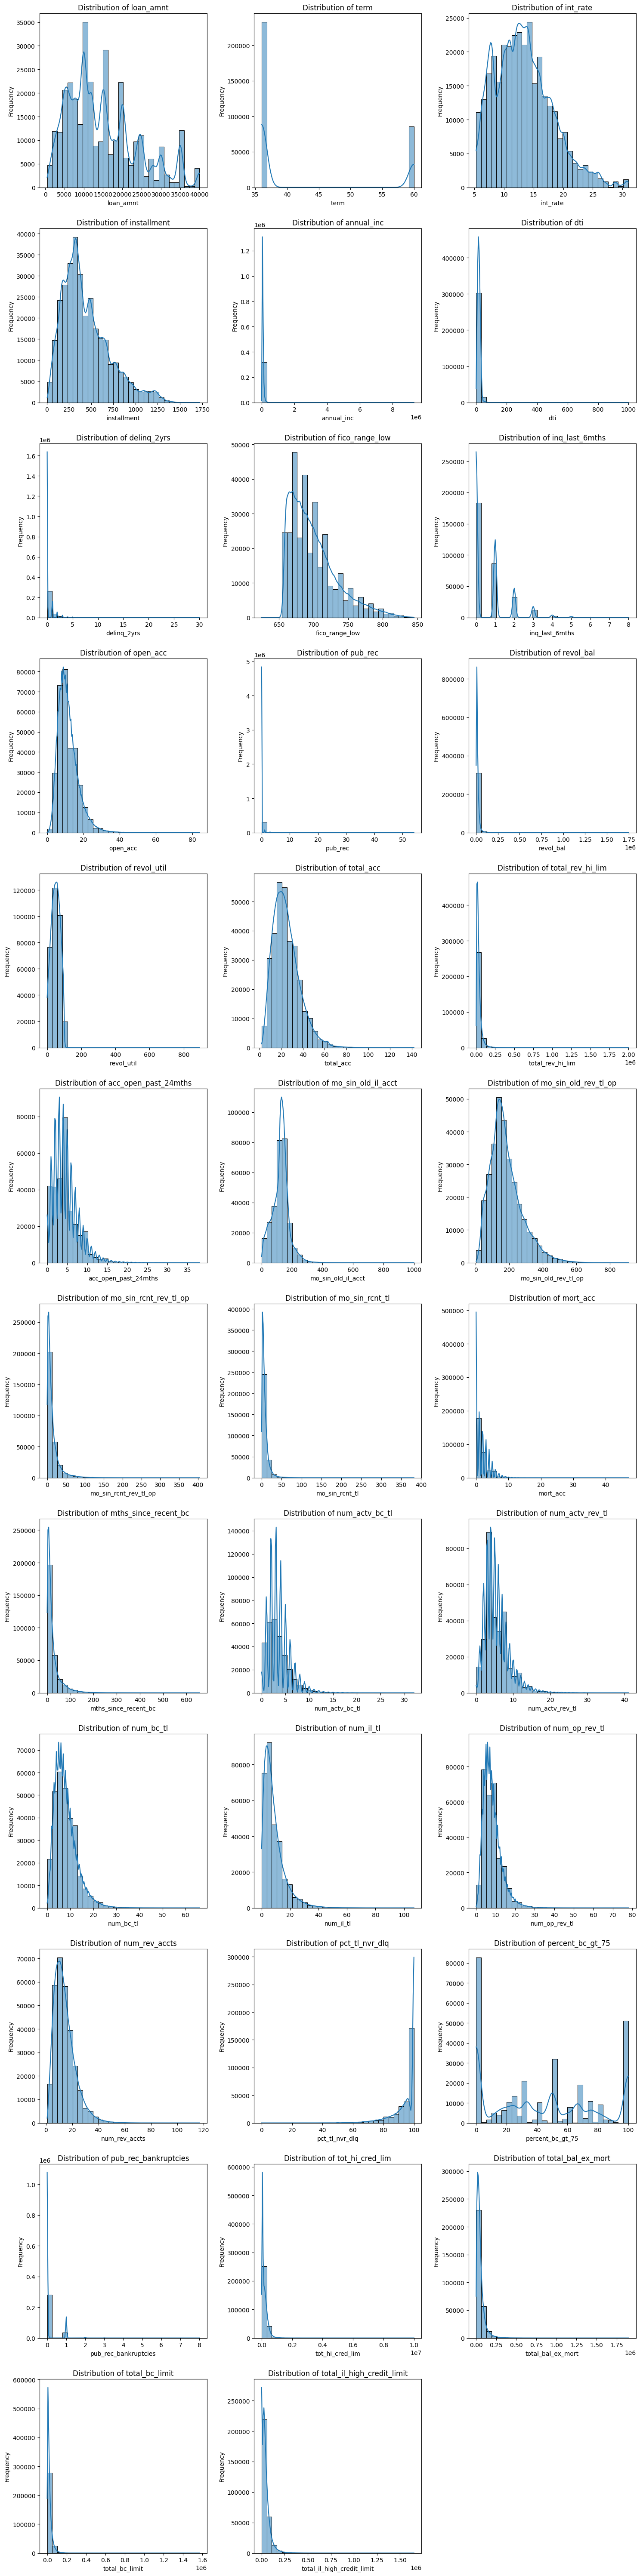

In [ ]:
# Identify numerical columns (excluding date columns and 'default')
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('default')

# Determine the number of rows and columns for subplots for numerical variables
n_cols_num = 3
n_rows_num = (len(numerical_cols) + n_cols_num - 1) // n_cols_num

# Create subplots for numerical variables
fig_num, axes_num = plt.subplots(n_rows_num, n_cols_num, figsize=(15, n_rows_num * 5))
axes_num = axes_num.flatten() # Flatten the axes array

# Plot histograms for numerical columns using seaborn
for i, col in enumerate(numerical_cols):
    sns.histplot(data=data, x=col, bins=30, kde=True, ax=axes_num[i])
    axes_num[i].set_title(f'Distribution of {col}')
    axes_num[i].set_xlabel(col)
    axes_num[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes_num)):
    fig_num.delaxes(axes_num[j])

plt.tight_layout()
plt.show()

***OBSERVATIONS***

- Most of the variables are right skewed with outliers. Will examine and handle outliers after getting more insight from EDA.

- dti and revol_util also show some skewness and potential outliers, which was noted during the missing value analysis.

- delinq_2yrs, pub_rec, and inq_last_6mths have a large number of observations at zero, indicating that a significant portion of borrowers have not had delinquencies, public records, or inquiries in the last 6 months.

- fico_range_low appears to have a roughly normal distribution centered around a higher score.

May log transform some of the continuous variables after handling outliers to reduce skewness.

### **iv. Count Plots for Categorical Variables**

emp_length will be plotted separately because it has too many counts.

In [ ]:
# Select columns with object data types
categorical_cols = data.select_dtypes(include='object').columns.tolist()

# Exclude the target variable 'default' and 'emp_title'
#if 'default' in categorical_cols:
    #categorical_cols.remove('default')
if 'emp_title' in categorical_cols:
    categorical_cols.remove('emp_title')

# Drop the 'title' column as it is causing issues with plotting and is redundant
if 'title' in categorical_cols:
    categorical_cols.remove('title')
    # Assuming 'data' is your DataFrame, drop the column from the DataFrame itself
    if 'title' in data.columns:
        data.drop('title', axis=1, inplace=True)


# Print the list of identified categorical columns
print("Categorical columns:")
print(categorical_cols)

# Determine the number of rows and columns for subplots for categorical variables
n_cols_cat = 3
n_rows_cat = (len(categorical_cols) + n_cols_cat - 1) // n_cols_cat

# Create subplots for categorical variables
fig_cat, axes_cat = plt.subplots(n_rows_cat, n_cols_cat, figsize=(15, n_rows_cat * 5))
axes_cat = axes_cat.flatten() # Flatten the axes array for easy iteration

# Plot count plots for categorical columns using seaborn
for i, col in enumerate(categorical_cols):
    # Use x=col for vertical bars
    sns.countplot(data=data, x=col, order=data[col].value_counts().index, ax=axes_cat[i])
    axes_cat[i].set_title(f'Distribution of {col}', usetex=False) # Disable math text rendering
    axes_cat[i].set_xlabel(col)
    axes_cat[i].set_ylabel('Count')
    # Rotate x-axis labels for better readability if there are many categories
    axes_cat[i].tick_params(axis='x', rotation=45)
    plt.setp(axes_cat[i].get_xticklabels(), horizontalalignment='right')


# Hide any unused subplots
for j in range(i + 1, len(axes_cat)):
    fig_cat.delaxes(axes_cat[j])

plt.tight_layout()
plt.show()

Categorical columns:
['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'application_type']


***OBSERVATIONS***

- title and purpose are too similar. Will drop title to avoid redundancy.

- grade and sub_grade show a decreasing trend in counts from B to G.

- emp_length has a large proportion of borrowers with '10+ years' of employment and a notable number of 'nan' values (which we previously identified as a string).

- home_ownership is dominated by 'MORTGAGE' and 'RENT'. The count of ANY and NONE are too small. Will likely merge them with any category to prevent overfitting. Same with purpose and addr_state.

- verification_status is mostly 'Not Verified' and 'Source Verified'.

- purpose is heavily skewed towards 'debt_consolidation' and 'credit_card'.

- addr_state shows a wide distribution across many states, with some states having significantly more loans than others (e.g., CA, TX, FL, NY).

- application_type is predominantly 'Individual'.

#### **Distribution of Employment Title (emp_title)**

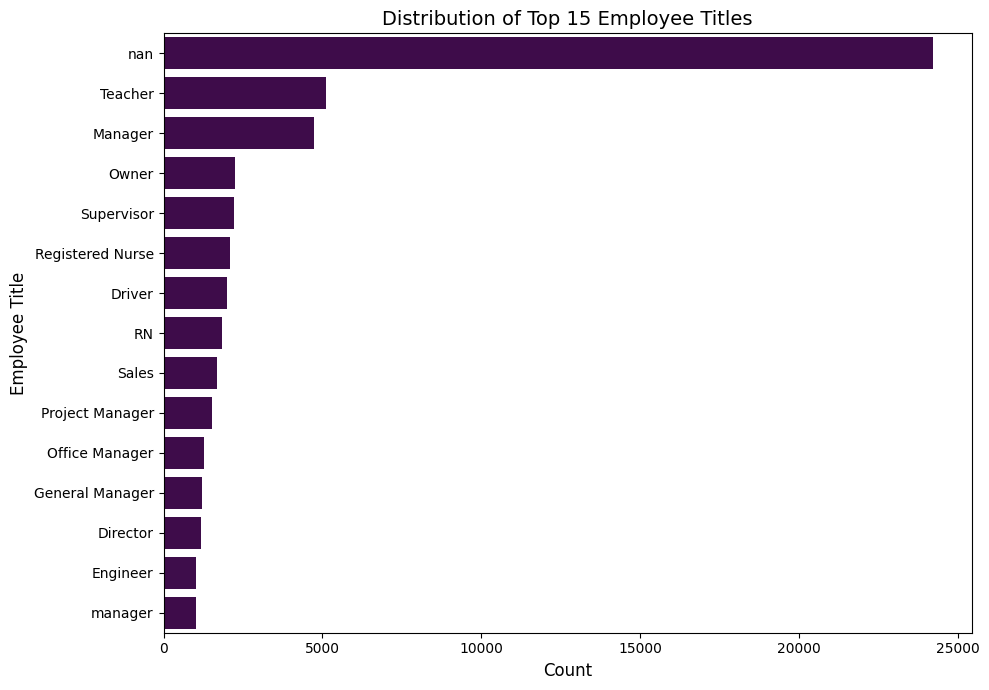

In [ ]:
# Get the top 15 most frequent employee titles
top_emp_titles = data['emp_title'].value_counts().nlargest(15).index

# Create a count plot for the top employee titles
plt.figure(figsize=(10, 7))
sns.countplot(data=data, y='emp_title', order=top_emp_titles, hue='emp_title', palette='viridis', legend=False)
plt.title('Distribution of Top 15 Employee Titles', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Employee Title', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the default rate for each employee title
emp_title_default_rate = data.groupby('emp_title', observed=False)['default'].mean().reset_index()
emp_title_default_rate.columns = ['emp_title', 'default_rate']

# Get the count of each employee title
emp_title_counts = data['emp_title'].value_counts().reset_index()
emp_title_counts.columns = ['emp_title', 'count']

# Merge the default rates and counts
emp_title_summary = pd.merge(emp_title_default_rate, emp_title_counts, on='emp_title')

# Sort by count in descending order
emp_title_summary = emp_title_summary.sort_values(by='count', ascending=False)

# Display the summary table for the top employee titles (e.g., top 50)
print("Summary of Employee Title Default Rates and Counts (Top 50 by Count):")
display(emp_title_summary.head(50))

Summary of Employee Title Default Rates and Counts (Top 50 by Count):


emp_title  default_rate  count
109742                       nan      0.270218  24236
90875                    Teacher      0.175837   5107
53947                    Manager      0.211762   4727
63369                      Owner      0.293961   2252
88810                 Supervisor      0.230631   2220
73599           Registered Nurse      0.172315   2095
29211                     Driver      0.276853   1983
71824                         RN      0.187229   1848
77524                      Sales      0.228049   1697
69886            Project Manager      0.162516   1526
61807             Office Manager      0.190625   1280
38062            General Manager      0.234078   1209
26424                   Director      0.157227   1183
31587                   Engineer      0.164370   1016
108842                   manager      0.268123   1007
110422                     owner      0.275824    910
68094                  President      0.212291    895
62566         Operations Manager      0.196056    862
114473                   teacher      0.185096    832
97733             Vice President      0.128797    823
2990    Administrative Assistant      0.180784    791
2122                  Accountant      0.152610    747
105177                    driver      0.265499    742
77703              Sales Manager      0.208392    715
91599                 Technician      0.207865    712
7880                    Attorney      0.096045    708
94394               Truck Driver      0.295252    674
2003             Account Manager      0.188906    667
60968                      Nurse      0.242879    667
67410             Police Officer      0.140888    653
32675        Executive Assistant      0.162479    597
4793                     Analyst      0.166954    581
56153                   Mechanic      0.225862    580
114205                supervisor      0.230216    556
88016              Store Manager      0.253165    553
112534                     sales      0.214418    541
64901                  Paralegal      0.180791    531
6477           Assistant Manager      0.214145    509
81910                     Server      0.236842    494
83629          Software Engineer      0.089613    491
94432               Truck driver      0.305732    471
11139             Branch Manager      0.190687    451
30914                Electrician      0.184685    444
20787                 Consultant      0.138824    425
21173                 Controller      0.146572    423
69568            Program Manager      0.104623    411
36205                    Foreman      0.248780    410
73713           Registered nurse      0.175309    405
88673             Superintendent      0.154822    394
3173               Administrator      0.208651    393

Will drop this variable. There is not much variation in their default rates. Moreover, the cardinality is too high making it too cumbersome to pre-process. Will come back to it if need be.

In [ ]:
data.drop('emp_title', axis=1, inplace=True)

KeyError: "['emp_title'] not found in axis"

_

## **4. BIVARIATE / MULTIVARIATE ANALYSIS**

###**i. Visualising the Default/Non Default Count of Categorical Variables**

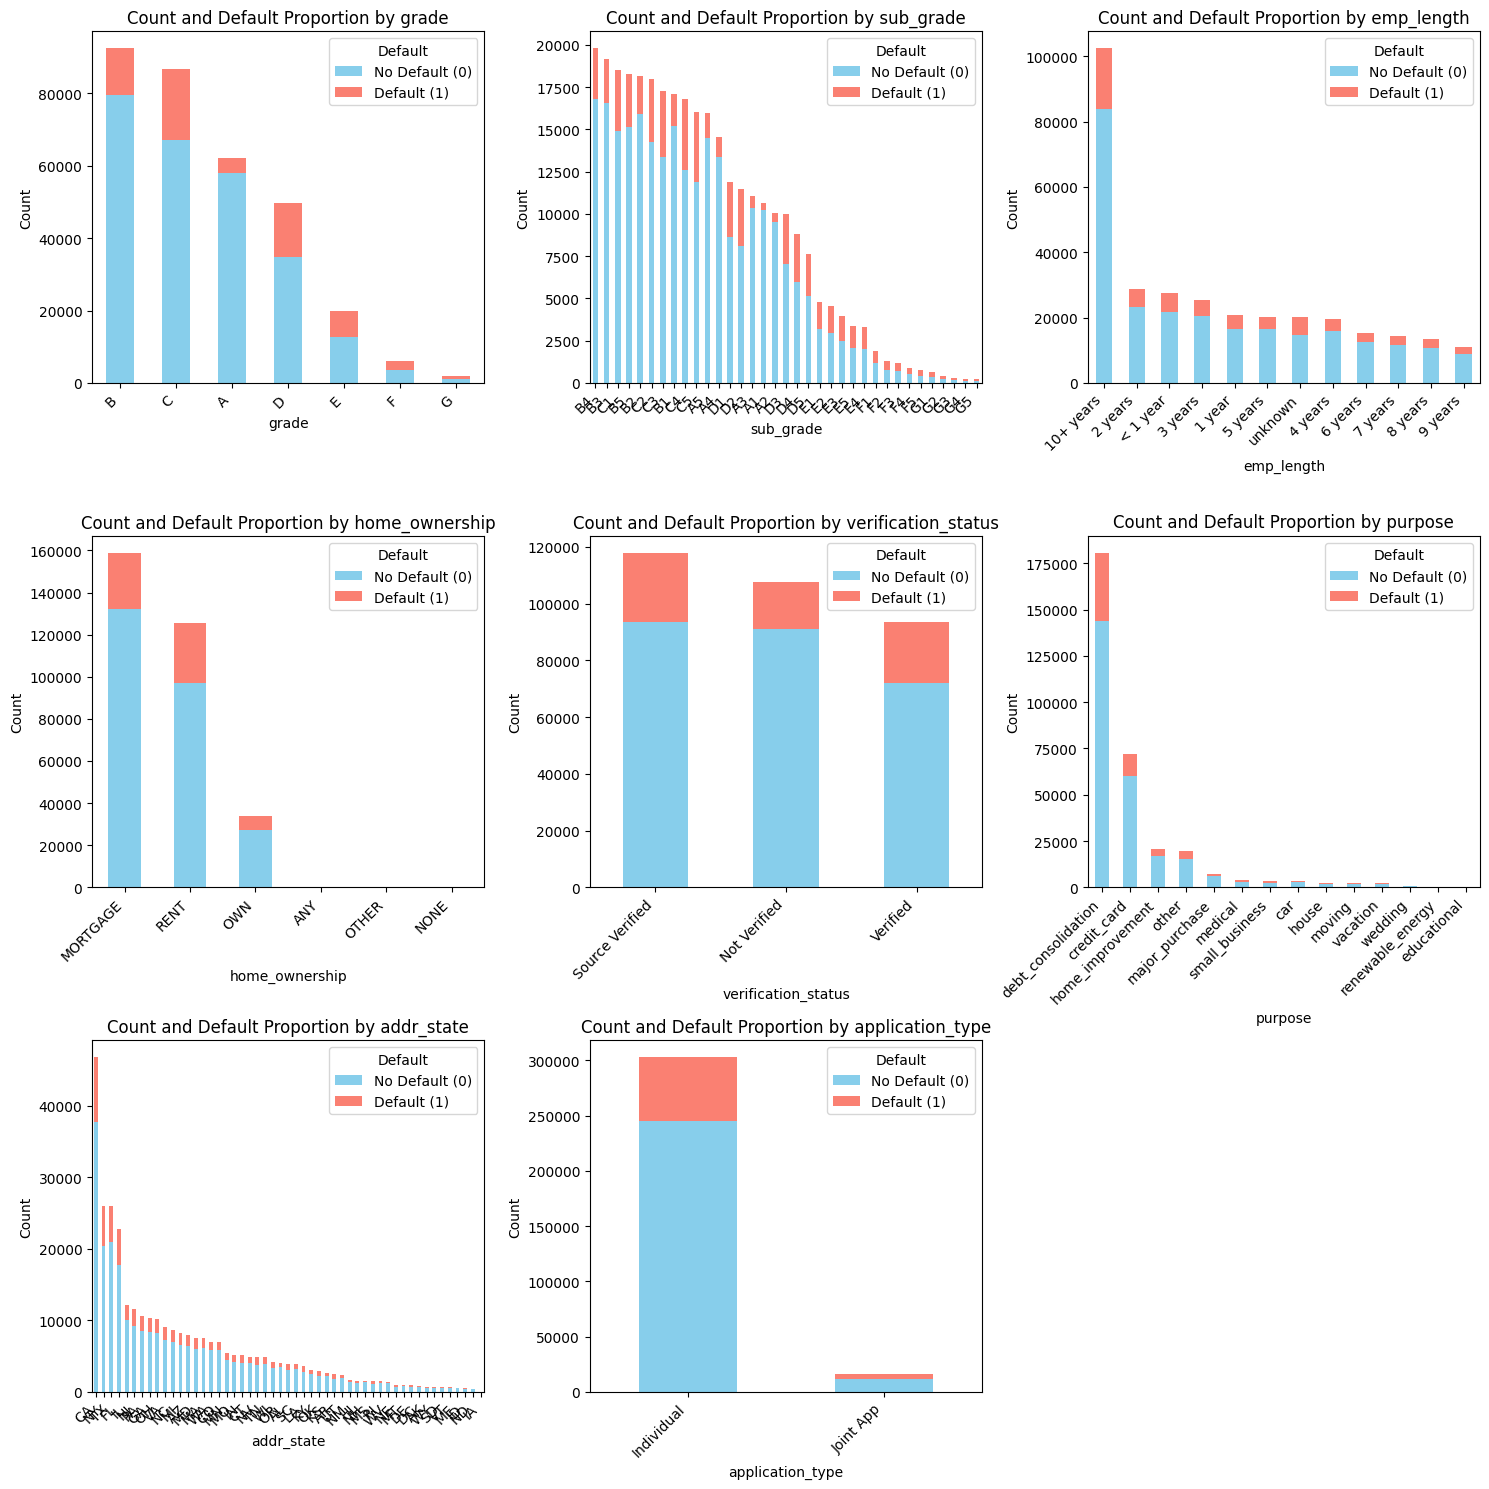

In [ ]:
# Include object and category dtypes
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the axes array for easy iteration

# Plot count and default proportion for each categorical column
for i, col in enumerate(categorical_cols):
    if col != 'default': # Exclude the target variable itself
        # Calculate value counts for each category and default status
        # Explicitly cast to object to potentially avoid FutureWarning with category dtype
        count_by_default = data.groupby([data[col].astype(object), 'default']).size().unstack(fill_value=0)

        # Sort by total count in descending order
        count_by_default['Total'] = count_by_default.sum(axis=1)
        count_by_default = count_by_default.sort_values('Total', ascending=False).drop('Total', axis=1)

        # Plot stacked bar chart
        count_by_default.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=axes[i])

        axes[i].set_title(f'Count and Default Proportion by {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
        plt.setp(axes[i].get_xticklabels(), horizontalalignment='right')
        axes[i].legend(title='Default', labels=['No Default (0)', 'Default (1)'])

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Save the figure to Google Drive
#save_path = '/content/drive/MyDrive/Categorical_Default_non_Default_Count.png'
#fig.savefig(save_path, bbox_inches='tight')

plt.show()

###**ii. Visualising the Default/Non Default Rate in Categorical Variables**

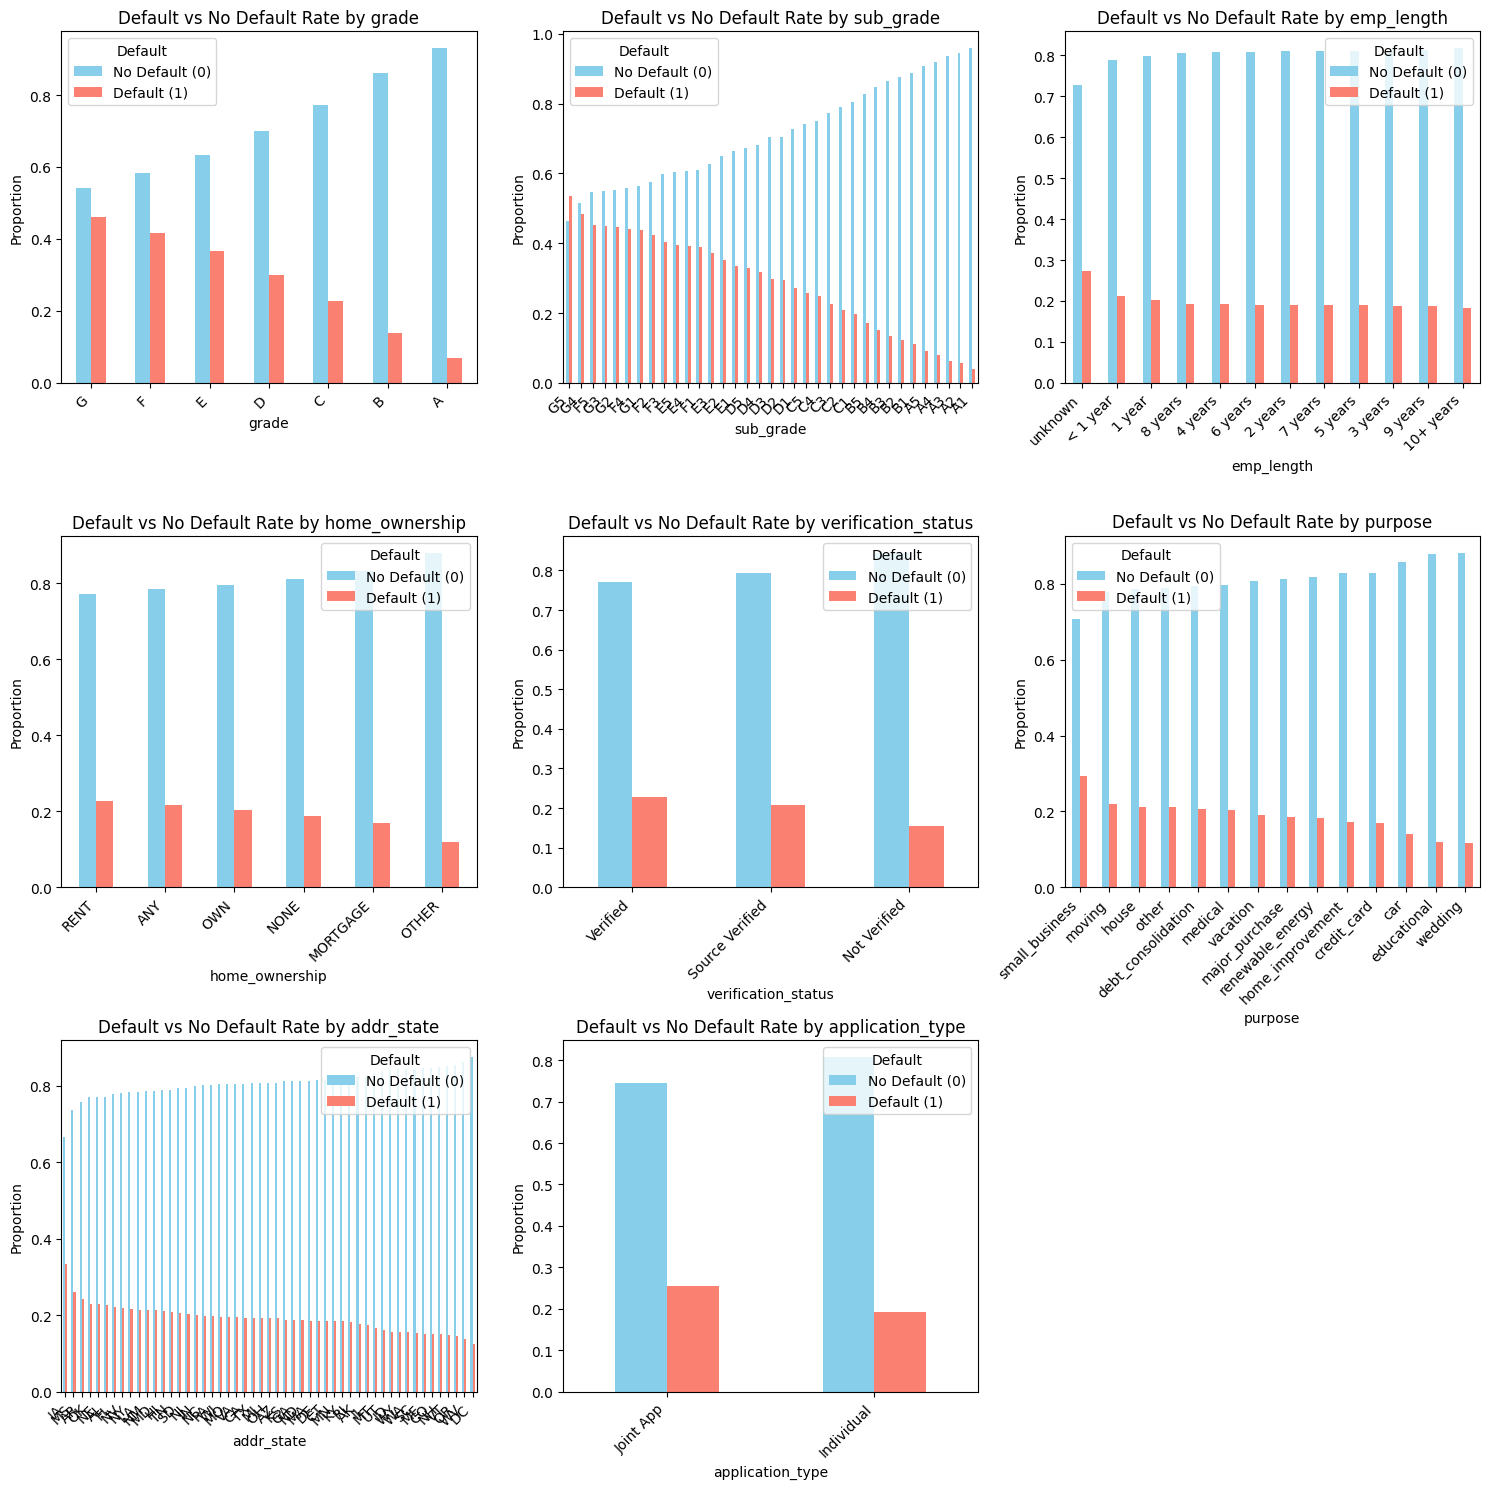

In [ ]:
# Identify categorical columns (excluding the target variable and dates)
# Include object and category dtypes
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the axes array for easy iteration

# Plot default and non-default proportion for each categorical column
for i, col in enumerate(categorical_cols):
    proportion_by_default = data.groupby(col, observed=False)['default'].value_counts(normalize=True).unstack(fill_value=0)
    default_rate_order = proportion_by_default[1].sort_values(ascending=False).index
    proportion_by_default = proportion_by_default.loc[default_rate_order]


    # Plot stacked bar chart of proportions
    proportion_by_default.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], ax=axes[i]) # Stacked=False for side-by-side

    axes[i].set_title(f'Default vs No Default Rate by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion')
    axes[i].tick_params(axis='x', rotation=45)
    plt.setp(axes[i].get_xticklabels(), horizontalalignment='right')
    axes[i].legend(title='Default', labels=['No Default (0)', 'Default (1)'])


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Define the path to save the figure in Google Drive
#save_path = '/content/drive/MyDrive/Categorical_Default_non_Default_Rate.png'

# Save the figure to Google Drive
#fig.savefig(save_path, bbox_inches='tight')

plt.show()

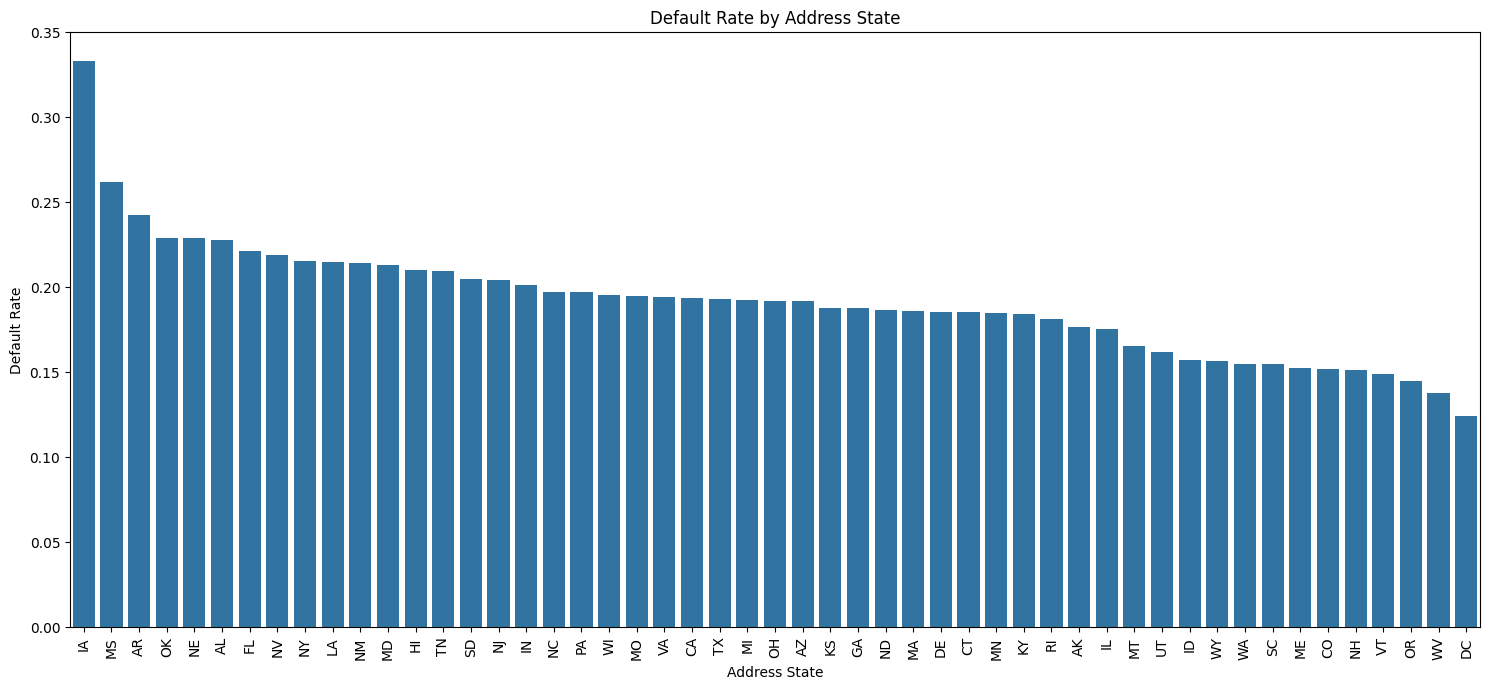

In [ ]:
# Plot the distribution of addr_state
plt.figure(figsize=(15, 7))
sns.countplot(data=data, x='addr_state', order=data['addr_state'].value_counts().index)
plt.title('Distribution of Address State')
plt.xlabel('Address State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Calculate and plot the default rate by addr_state
addr_state_default_rate = data.groupby('addr_state', observed=False)['default'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(x=addr_state_default_rate.index, y=addr_state_default_rate.values)
plt.title('Default Rate by Address State')
plt.xlabel('Address State')
plt.ylabel('Default Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
state_mapping = {
    'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AZ': 'Arizona', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'IA': 'Iowa', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana',
    'MA': 'Massachusetts', 'MD': 'Maryland', 'ME': 'Maine', 'MI': 'Michigan', 'MN': 'Minnesota',
    'MO': 'Missouri', 'MS': 'Mississippi', 'MT': 'Montana', 'NC': 'North Carolina', 'ND': 'North Dakota',
    'NE': 'Nebraska', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NV': 'Nevada',
    'NY': 'New York', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania',
    'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee',
    'TX': 'Texas', 'UT': 'Utah', 'VA': 'Virginia', 'VT': 'Vermont', 'WA': 'Washington',
    'WI': 'Wisconsin', 'WV': 'West Virginia', 'WY': 'Wyoming'
}

data['addr_state'] = data['addr_state'].map(state_mapping)

In [ ]:
region_mapping = {
    'Alaska': 'West', 'Alabama': 'SouthEast', 'Arkansas': 'SouthEast', 'Arizona': 'SouthWest',
    'California': 'West', 'Colorado': 'West', 'Connecticut': 'NorthEast', 'District of Columbia': 'SouthEast',
    'Delaware': 'SouthEast', 'Florida': 'SouthEast', 'Georgia': 'SouthEast', 'Hawaii': 'West', 'Iowa': 'MidWest',
    'Idaho': 'West', 'Illinois': 'MidWest', 'Indiana': 'MidWest', 'Kansas': 'MidWest', 'Kentucky': 'SouthEast',
    'Louisiana': 'SouthEast', 'Massachusetts': 'NorthEast', 'Maryland': 'NorthEast', 'Maine': 'NorthEast',
    'Michigan': 'MidWest', 'Minnesota': 'MidWest', 'Missouri': 'MidWest', 'Mississippi': 'SouthEast',
    'Montana': 'West', 'North Carolina': 'SouthEast', 'North Dakota': 'MidWest', 'Nebraska': 'MidWest',
    'New Hampshire': 'NorthEast', 'New Jersey': 'NorthEast', 'New Mexico': 'SouthWest', 'Nevada': 'West',
    'New York': 'NorthEast','Ohio': 'MidWest', 'Oklahoma': 'SouthWest', 'Oregon': 'West',
    'Pennsylvania': 'NorthEast', 'Rhode Island': 'NorthEast', 'South Carolina': 'SouthEast',
    'South Dakota': 'MidWest','Tennessee': 'SouthEast', 'Texas': 'SouthWest', 'Utah': 'West',
    'Virginia': 'SouthEast', 'Vermont': 'NorthEast', 'Washington': 'West', 'Wisconsin': 'MidWest',
    'West Virginia': 'SouthEast', 'Wyoming': 'West'
}

data['region'] = data['addr_state'].map(region_mapping)

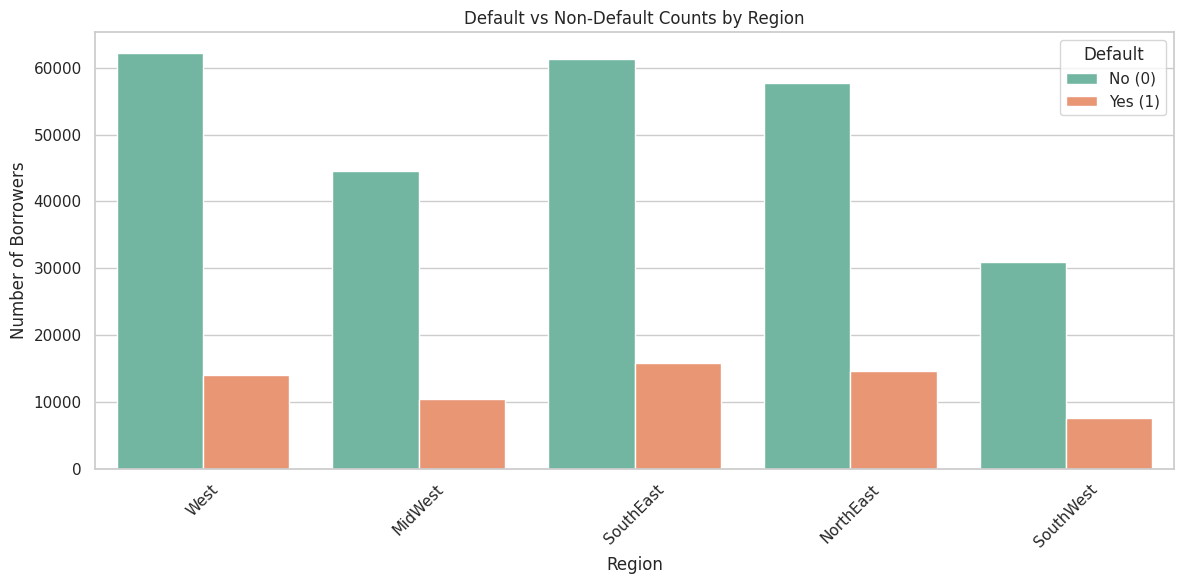

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Create a count plot of default status by region
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="region", hue="default", palette="Set2")

# Add labels and title
plt.xlabel("Region")
plt.ylabel("Number of Borrowers")
plt.title("Default vs Non-Default Counts by Region")
plt.legend(title="Default", labels=["No (0)", "Yes (1)"])
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

###**iii. Tabular Representation of Count and Default Rate of Each Category in Each Categorical Column.**

In [ ]:
# Identify categorical columns (excluding the target variable and dates)
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
if 'default' in categorical_cols:
    categorical_cols.remove('default')

# Generate and display a table of counts and default rates for each categorical variable
for col in categorical_cols:
    print(f"\nTable for '{col}':")
    # Calculate value counts
    counts = data[col].value_counts().reset_index()
    counts.columns = [col, 'Count']

    # Calculate default rates
    default_rates = data.groupby(col, observed=False)['default'].mean().reset_index()
    default_rates.columns = [col, 'Default Rate']

    # Merge counts and default rates
    category_summary = pd.merge(counts, default_rates, on=col)

    # Sort by default rate in descending order
    category_summary = category_summary.sort_values('Default Rate', ascending=False)

    display(category_summary)
    print("-" * 50)


Table for 'grade':


grade  Count  Default Rate
6     G   1790      0.459777
5     F   5994      0.415582
4     E  19993      0.365978
3     D  49760      0.299076
1     C  86630      0.226596
0     B  92543      0.139297
2     A  62283      0.069570

--------------------------------------------------

Table for 'sub_grade':


sub_grade  Count  Default Rate
34        G5    224      0.535714
33        G4    244      0.483607
29        F5    744      0.452957
32        G3    296      0.449324
31        G2    399      0.446115
28        F4    906      0.441501
30        G1    627      0.437002
26        F2   1278      0.424883
27        F3   1178      0.402377
23        E5   3370      0.395846
24        E4   3307      0.393408
25        F1   1888      0.390360
22        E3   3971      0.373206
21        E2   4537      0.350893
20        E1   4808      0.334443
19        D5   7631      0.327873
18        D4   8796      0.318895
17        D3   9996      0.296419
13        D2  11474      0.295015
12        D1  11863      0.272022
9         C5  16047      0.258678
8         C4  16797      0.249092
6         C3  17268      0.226720
5         C2  17977      0.208433
2         C1  18541      0.195944
3         B5  18289      0.172016
0         B4  19813      0.151416
1         B3  19171      0.135413
4         B2  18164      0.122770
7         B1  17106      0.112183
10        A5  15960      0.092544
11        A4  14551      0.080407
14        A3  11060      0.062387
16        A2  10069      0.055815
15        A1  10643      0.040778

--------------------------------------------------

Table for 'emp_length':


emp_length   Count  Default Rate
6     unknown   20088      0.272601
2    < 1 year   27531      0.211434
4      1 year   20799      0.202702
10    8 years   13341      0.193014
7     4 years   19490      0.192509
8     6 years   15393      0.191321
1     2 years   28616      0.190103
9     7 years   14471      0.189828
5     5 years   20316      0.189703
3     3 years   25395      0.188777
11    9 years   11006      0.187716
0   10+ years  102547      0.182170

--------------------------------------------------

Table for 'home_ownership':


home_ownership   Count  Default Rate
1           RENT  125686      0.227885
3            ANY     209      0.215311
2            OWN   34028      0.203362
5           NONE      16      0.187500
0       MORTGAGE  159012      0.168239
4          OTHER      42      0.119048

--------------------------------------------------

Table for 'verification_status':


verification_status   Count  Default Rate
2            Verified   93455      0.228334
0     Source Verified  117994      0.206544
1        Not Verified  107544      0.154885

--------------------------------------------------

Table for 'purpose':


purpose   Count  Default Rate
6       small_business    3656      0.293490
9               moving    2224      0.220324
8                house    2268      0.212522
3                other   19472      0.211072
0   debt_consolidation  180843      0.205654
5              medical    3782      0.203596
10            vacation    2157      0.191933
4       major_purchase    7250      0.185793
12    renewable_energy     231      0.181818
2     home_improvement   20594      0.170924
1          credit_card   72252      0.170860
7                  car    3474      0.141048
13         educational     108      0.120370
11             wedding     682      0.117302

--------------------------------------------------

Table for 'addr_state':


addr_state  Count  Default Rate
50         IA      3      0.333333
36         MS   1539      0.261858
31         AR   2447      0.242746
29         OK   2836      0.229196
39         NE    912      0.229167
25         AL   3891      0.227962
3          FL  22701      0.221444
21         NV   4851      0.218924
1          NY  26021      0.215518
27         LA   3537      0.215154
33         NM   1712      0.214369
13         MD   7514      0.213069
34         HI   1568      0.210459
22         TN   4844      0.209744
45         SD    634      0.205047
5          NJ  11634      0.204315
19         IN   5078      0.201457
10         NC   8697      0.197424
6          PA  10651      0.197258
23         WI   4167      0.195584
18         MO   5108      0.195184
9          VA   9007      0.194404
0          CA  46794      0.194042
2          TX  25971      0.193023
11         MI   8155      0.192397
8          OH  10191      0.191934
12         AZ   7887      0.191835
30         KS   2635      0.187856
7          GA  10354      0.187657
49         ND    418      0.186603
14         MA   7490      0.186115
41         DE    879      0.185438
20         CT   4877      0.185360
17         MN   5488      0.184949
28         KY   3112      0.184447
37         RI   1456      0.181319
43         AK    713      0.176718
4          IL  12126      0.175408
40         MT    894      0.165548
32         UT   2342      0.161827
48         ID    490      0.157143
44         WY    658      0.156535
15         WA   6971      0.155071
26         SC   3847      0.154666
47         ME    558      0.152330
16         CO   6942      0.152118
35         NH   1559      0.151379
46         VT    618      0.148867
24         OR   3981      0.144938
38         WV   1406      0.137980
42         DC    829      0.124246

--------------------------------------------------

Table for 'application_type':


application_type   Count  Default Rate
1        Joint App   15858      0.255013
0       Individual  303135      0.192399

--------------------------------------------------


***OBSERVATIONS***

- Grade and Subgrade: There's a clear trend of increasing default rates as the loan grade and subgrade get lower (from A to G). Grades E, F, and G have the highest default rates, while grades A and B have the lowest. The detailed subgrade table further refines this, showing the specific subgrades with the highest and lowest default risks. Will likely use Ordinal encoding to encode this variable for modeling.

- Employment Length: Borrowers with shorter employment lengths (< 1 year) and those with 'nan' (missing) employment length have notably higher default rates compared to those with longer employment histories, especially '10+ years'. This suggests employment stability is a significant factor. Additionally, nan makes a large proportion of the data. Will investigate the missingness and likely keep it as a category.

- Home Ownership: Borrowers with 'RENT' and 'ANY' home ownership status have higher default rates compared to those with 'MORTGAGE' or 'OWN'. However, ANY and NONE have very low counts compared to the other categories. Will likely merge both with OWN to avoid overfitting.

- Verification Status: Loans with 'Verified' status have a higher default rate than 'Source Verified' or 'Not Verified' loans. This might seem counterintuitive but could indicate that loans requiring more stringent verification were already considered higher risk.

- Purpose: Loans for 'small_business' have the highest default rate, followed by 'debt_consolidation' and 'moving'. Loans for 'car' and 'renewable_energy' have among the lowest default rates.

- Address State: Default rates vary by state, with some states showing higher default risk than others. States with larger loan volumes (like CA, TX, FL, NY) still represent a significant portion of both defaults and non-defaults, but their default rates might not be the highest.

- Application Type: 'Joint App' applications have a slightly higher default rate (around 26.0%) compared to 'Individual' applications (around 22.2%).

###**iv. Visualising the Default/Non Default Rate in Numeric Variables**

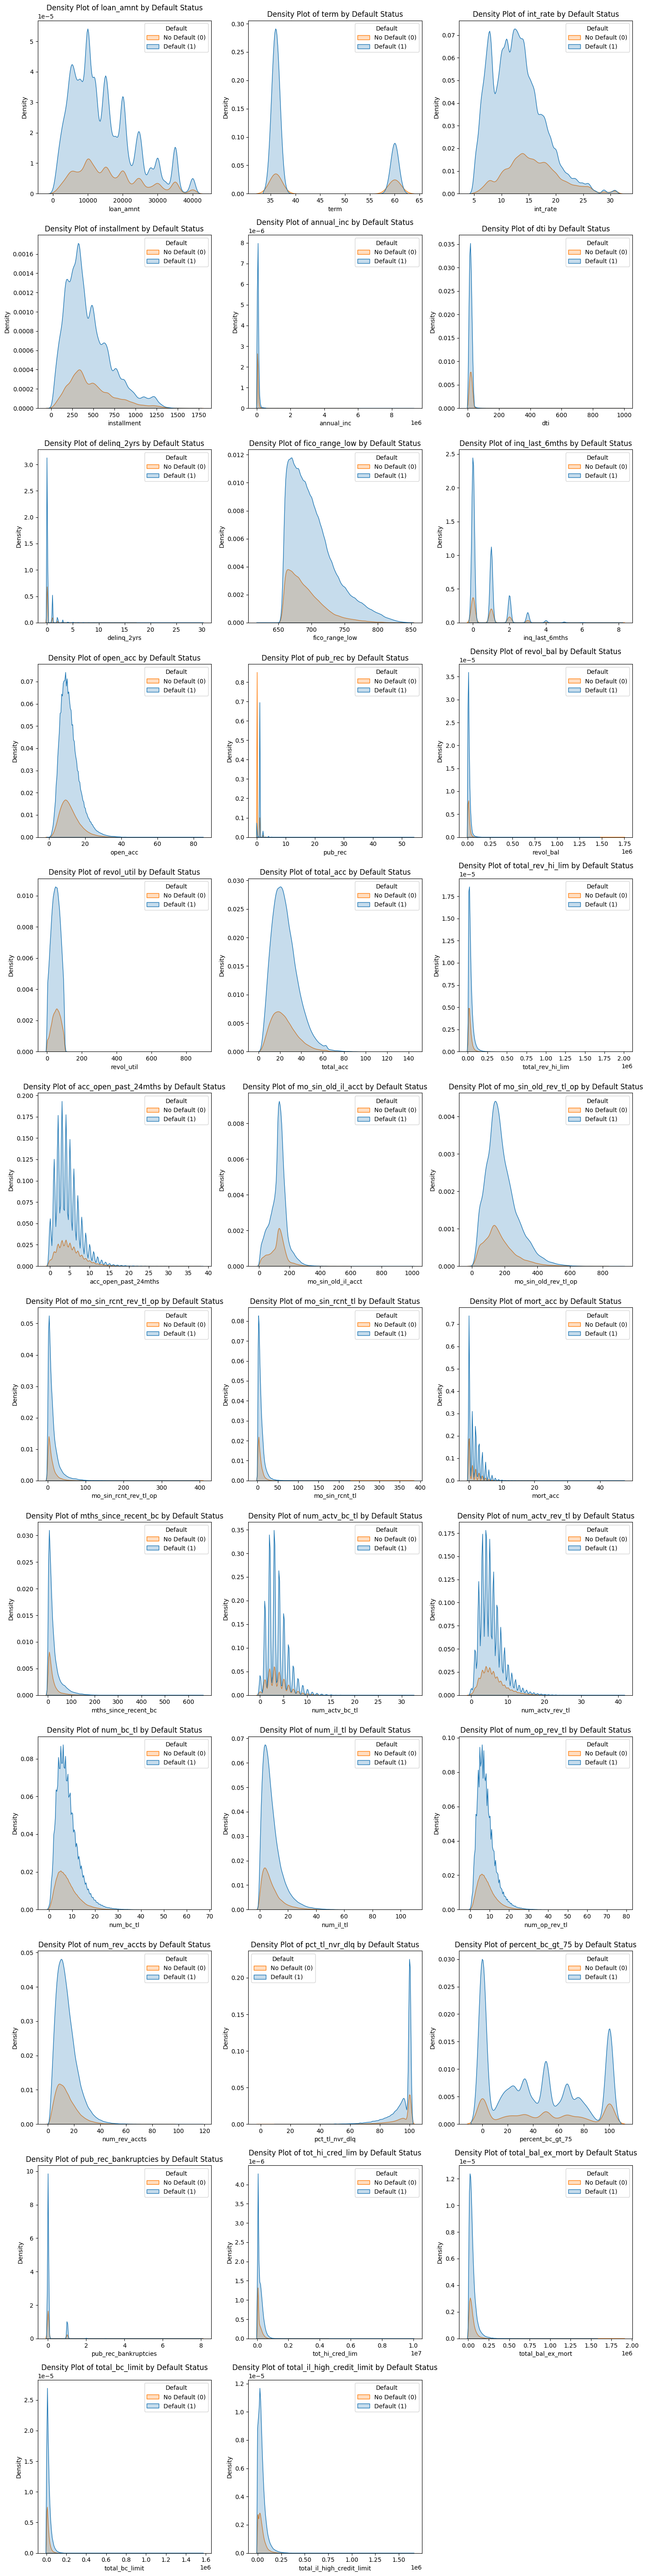

In [ ]:
# Identify numerical columns (excluding the target variable 'default' and date columns)
# We'll include both original and capped/transformed versions if they exist, for comparison
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
if 'default' in numerical_cols:
    numerical_cols.remove('default')

# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the axes array for easy iteration

# Plot density plots for each numerical column, colored by the 'default' variable
for i, col in enumerate(numerical_cols):
    if i < len(axes): # Ensure we don't exceed the number of subplots
        sns.kdeplot(data=data, x=col, hue='default', fill=True, ax=axes[i])
        axes[i].set_title(f'Density Plot of {col} by Default Status')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Density')
        # Add a legend to each plot
        axes[i].legend(title='Default', labels=['No Default (0)', 'Default (1)'])


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### **v. Correlation Analysis**

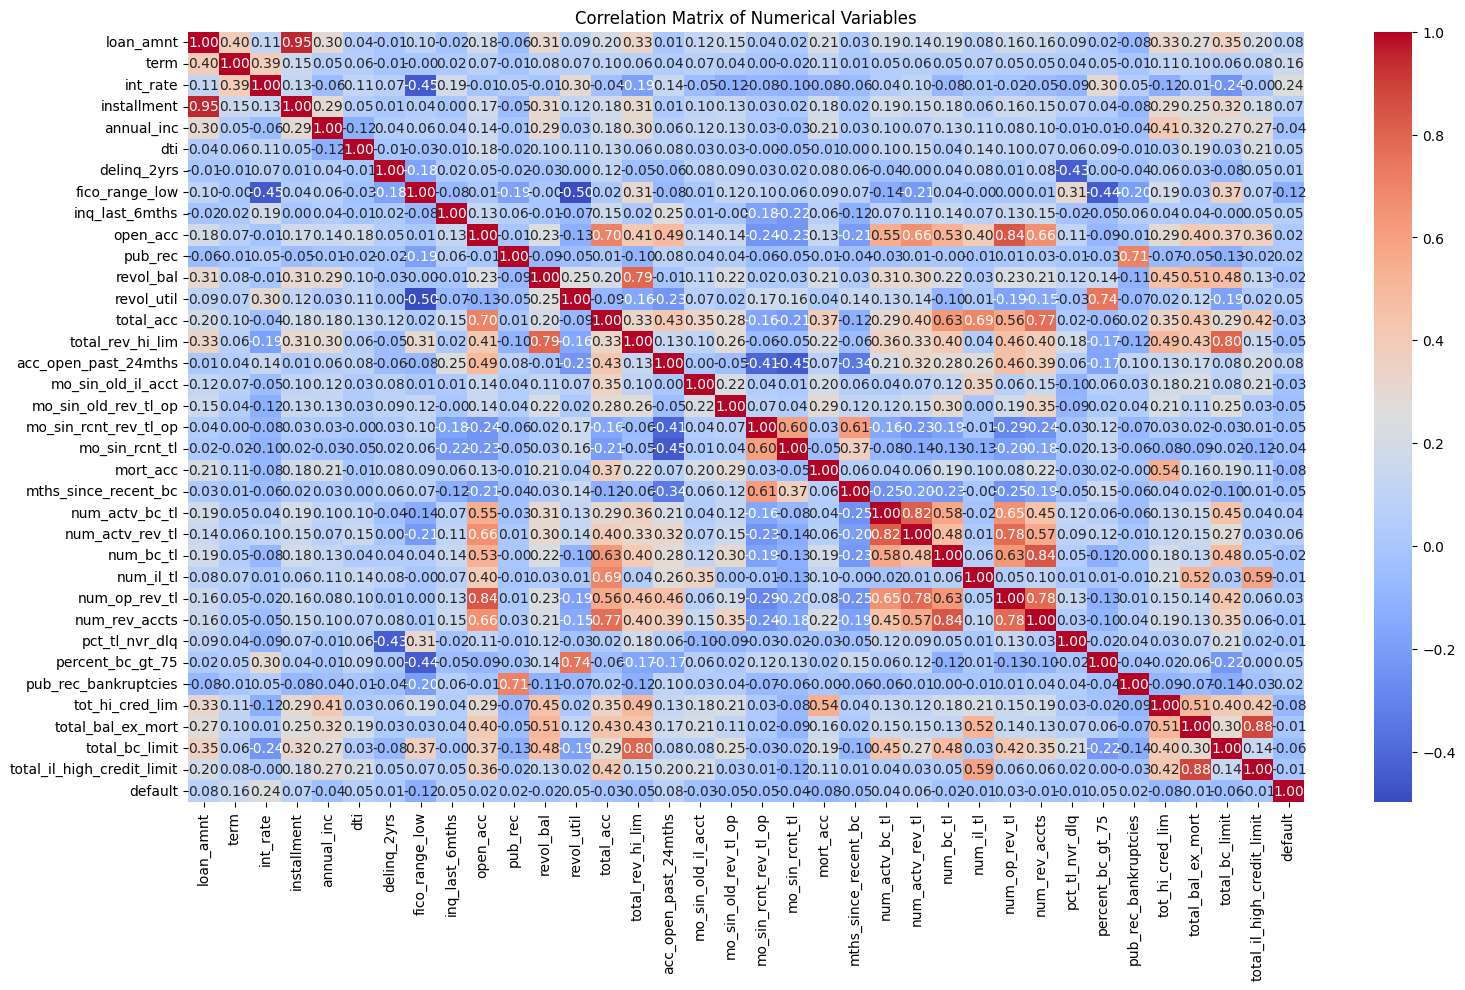

In [ ]:
 # Calculate the correlation matrix for numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns
correlation_matrix = data[numerical_cols].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

**OBSERVATION**

- Some variables are highly correlated and may cause multicollinearity. Will check using VIF.

####**Computing Variance Inflation Factor, VIF, to check Multicollinearity**


In [ ]:
# Select numeric features
numerical_cols = data.select_dtypes(include=np.number).columns

# Exclude columns with missing values
cols_with_missing_values = data.isnull().sum()[data.isnull().sum() > 0].index.tolist()
numerical_cols_no_missing = [col for col in numerical_cols if col not in cols_with_missing_values]

# Add a constant to the DataFrame for VIF calculation
X = add_constant(data[numerical_cols_no_missing])

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# Handle potential errors with VIF calculation (e.g., perfect multicollinearity)
try:
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
except Exception as e:
    print(f"Error calculating VIF: {e}")
    # If VIF calculation fails, you might have perfect multicollinearity.
    # You can inspect the correlation matrix or drop one of the perfectly correlated columns.
    vif_data["VIF"] = np.inf # Assign infinity or handle as appropriate


print(vif_data.sort_values(by="VIF", ascending=False))

           feature         VIF
0            const  716.488555
1        loan_amnt   51.481835
4      installment   44.368353
2             term    6.042992
3         int_rate    2.460569
12       total_acc    2.093721
9         open_acc    2.026612
7   fico_range_low    1.416547
11       revol_bal    1.222238
5       annual_inc    1.184729
8   inq_last_6mths    1.081523
13         default    1.075147
6      delinq_2yrs    1.060941
10         pub_rec    1.055356


Will drop either installment or loan amount later after feature engineering.

_

## **5. EXPLORING MISSING VALUES**

### **i. Visualizing Missing Values**

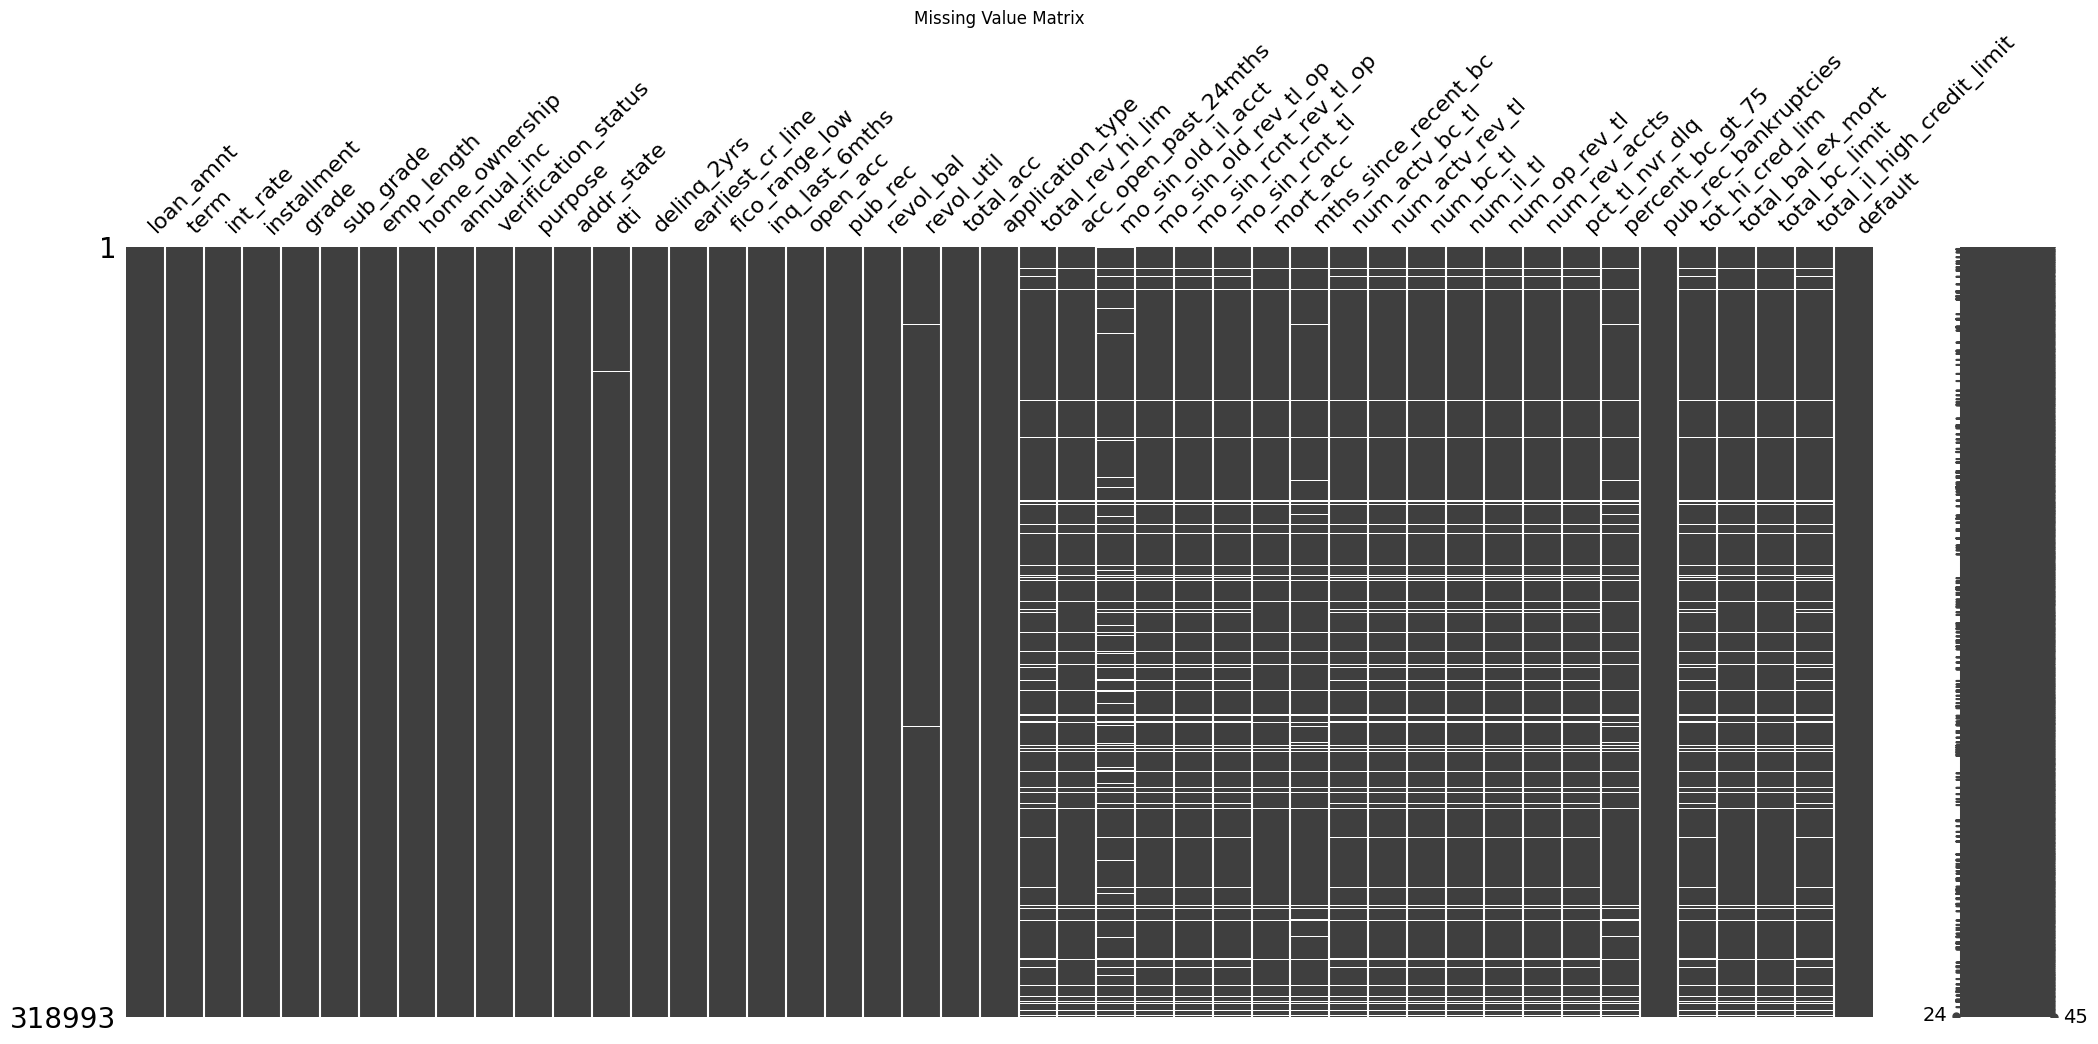

In [ ]:
# Visualize missing values as a matrix
msno.matrix(data)
plt.title('Missing Value Matrix')
plt.show()

In [ ]:
cols = [
     'total_rev_hi_lim',
    'mo_sin_old_rev_tl_op',
    'mo_sin_rcnt_rev_tl_op',
    'mo_sin_rcnt_tl',
    'num_actv_bc_tl',
    'num_actv_rev_tl',
    'num_bc_tl',
    'num_il_tl',
    'num_op_rev_tl',
    'num_rev_accts',
    'tot_hi_cred_lim',
    'total_il_high_credit_limit'
]

# Create a binary column 'missing_credit_block'
data['missing_credit_block'] = data[cols].isnull().all(axis=1).astype(int)

# Find the number of rows where all of these are NaN
missing_together = data['missing_credit_block'].sum()
print(f"Rows where all selected columns are missing together: {missing_together}")

Rows where all selected columns are missing together: 20126


In [ ]:
# Explore their default rate
display(data.loc[data['missing_credit_block'] == 1, 'default'].value_counts(normalize=True))

# Compare income, loan amount, etc.
#display(data.groupby('missing_credit_block')[['annual_inc', 'loan_amnt']].mean())

default
0    0.844778
1    0.155222
Name: proportion, dtype: float64

In [ ]:
data['default'].value_counts(normalize=True)


default
0    0.804488
1    0.195512
Name: proportion, dtype: float64

### **ii. Missing Percentages and Default Rates**

In [ ]:
# Calculate missing percentages

missing_pct = (data.isnull().sum() / len(data)) * 100
missing_summary = pd.DataFrame({
    'missing_count': data.isnull().sum(),
    'missing_pct': missing_pct
})
missing_summary = missing_summary.sort_values(by='missing_pct', ascending=False)
print("=== Missingness Summary ===")
print(missing_summary.head(20))   # top 20 by missing %

=== Missingness Summary ===
                            missing_count  missing_pct
mo_sin_old_il_acct                  29528     9.256629
pct_tl_nvr_dlq                      20172     6.323650
num_op_rev_tl                       20126     6.309229
num_il_tl                           20126     6.309229
total_il_high_credit_limit          20126     6.309229
num_actv_rev_tl                     20126     6.309229
mo_sin_rcnt_rev_tl_op               20126     6.309229
num_actv_bc_tl                      20126     6.309229
num_bc_tl                           20126     6.309229
mo_sin_rcnt_tl                      20126     6.309229
mo_sin_old_rev_tl_op                20126     6.309229
total_rev_hi_lim                    20126     6.309229
num_rev_accts                       20126     6.309229
tot_hi_cred_lim                     20126     6.309229
percent_bc_gt_75                    17704     5.549965
mths_since_recent_bc                17340     5.435856
total_bc_limit                      1


Column: dti
  Default rate when NOT missing (missing=0): 0.1955
  Default rate when missing (missing=1): 0.2182


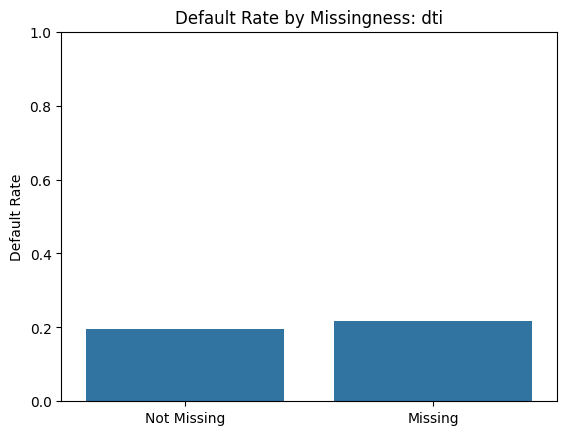


Column: revol_util
  Default rate when NOT missing (missing=0): 0.1955
  Default rate when missing (missing=1): 0.2210


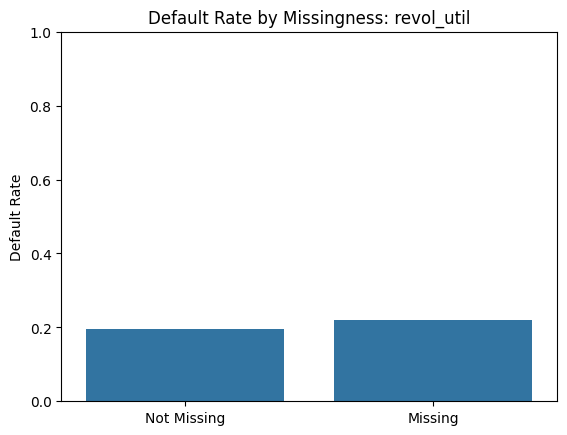


Column: total_rev_hi_lim
  Default rate when NOT missing (missing=0): 0.1982
  Default rate when missing (missing=1): 0.1552


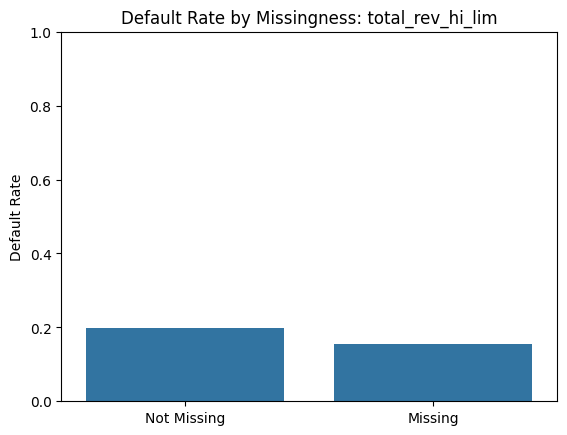


Column: acc_open_past_24mths
  Default rate when NOT missing (missing=0): 0.1978
  Default rate when missing (missing=1): 0.1469


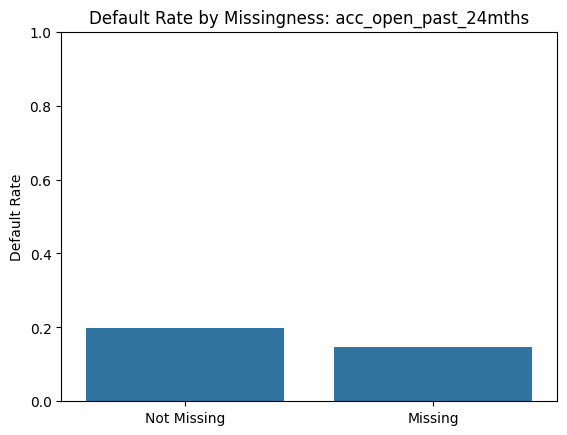


Column: mo_sin_old_il_acct
  Default rate when NOT missing (missing=0): 0.1970
  Default rate when missing (missing=1): 0.1813


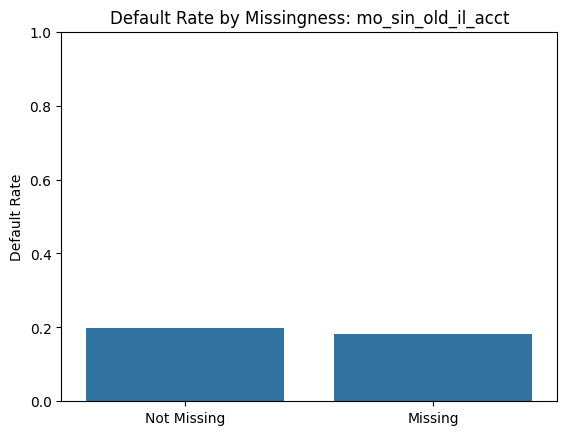


Column: mo_sin_old_rev_tl_op
  Default rate when NOT missing (missing=0): 0.1982
  Default rate when missing (missing=1): 0.1552


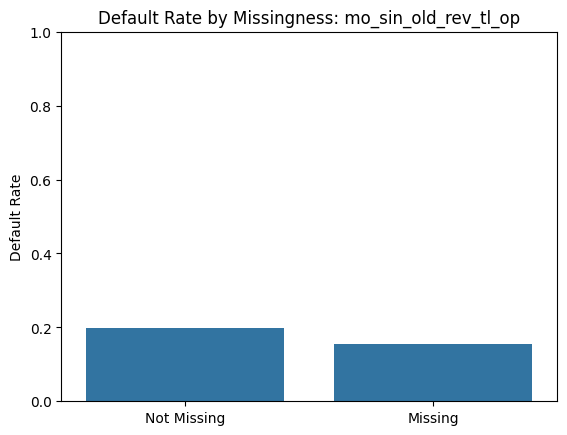


Column: mo_sin_rcnt_rev_tl_op
  Default rate when NOT missing (missing=0): 0.1982
  Default rate when missing (missing=1): 0.1552


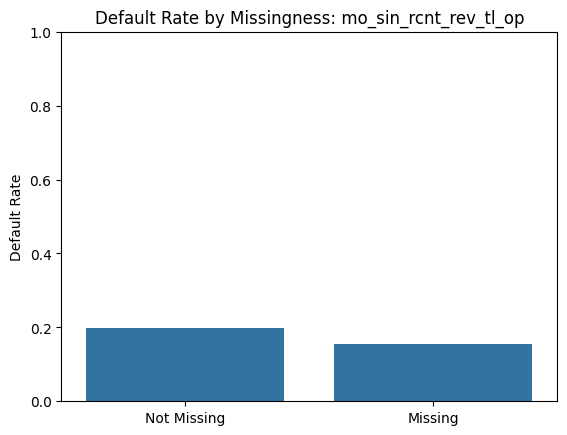


Column: mo_sin_rcnt_tl
  Default rate when NOT missing (missing=0): 0.1982
  Default rate when missing (missing=1): 0.1552


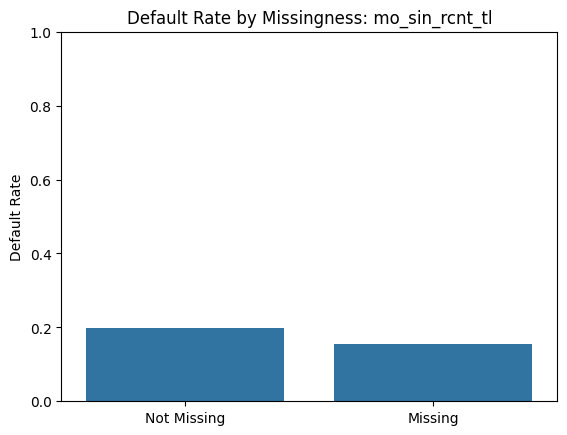


Column: mort_acc
  Default rate when NOT missing (missing=0): 0.1978
  Default rate when missing (missing=1): 0.1469


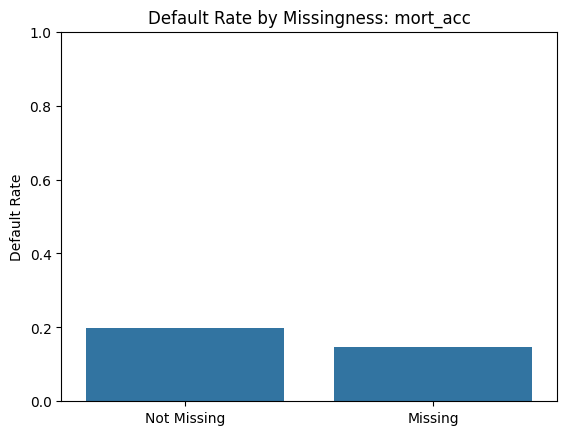


Column: mths_since_recent_bc
  Default rate when NOT missing (missing=0): 0.1977
  Default rate when missing (missing=1): 0.1570


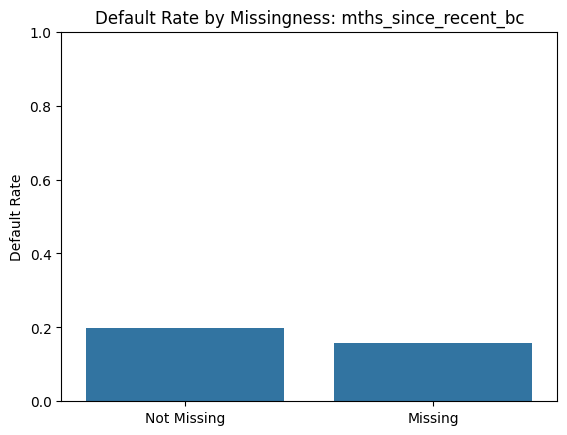


Column: num_actv_bc_tl
  Default rate when NOT missing (missing=0): 0.1982
  Default rate when missing (missing=1): 0.1552



Column: num_actv_rev_tl
  Default rate when NOT missing (missing=0): 0.1982
  Default rate when missing (missing=1): 0.1552


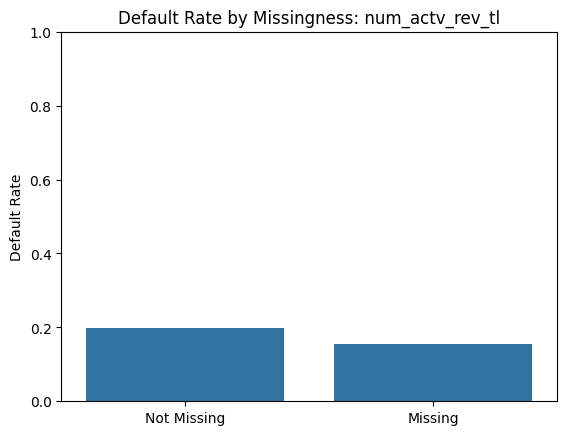


Column: num_bc_tl
  Default rate when NOT missing (missing=0): 0.1982
  Default rate when missing (missing=1): 0.1552


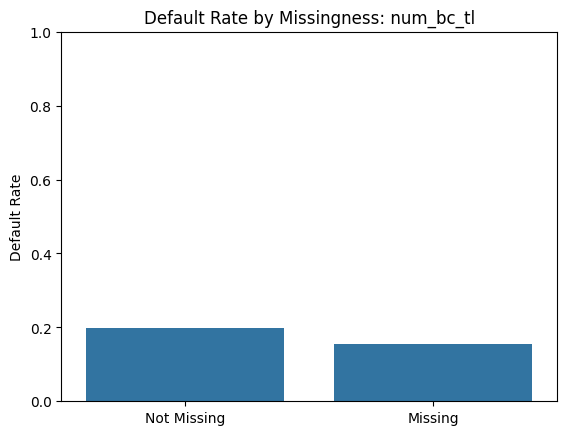


Column: num_il_tl
  Default rate when NOT missing (missing=0): 0.1982
  Default rate when missing (missing=1): 0.1552


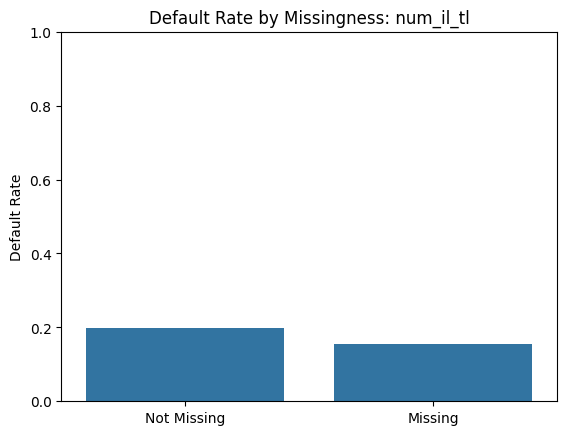


Column: num_op_rev_tl
  Default rate when NOT missing (missing=0): 0.1982
  Default rate when missing (missing=1): 0.1552


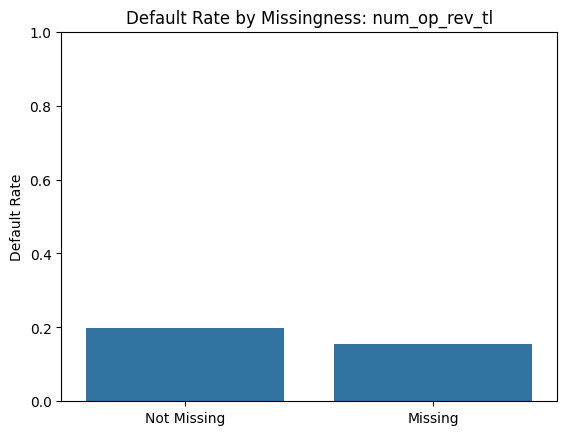


Column: num_rev_accts
  Default rate when NOT missing (missing=0): 0.1982
  Default rate when missing (missing=1): 0.1552


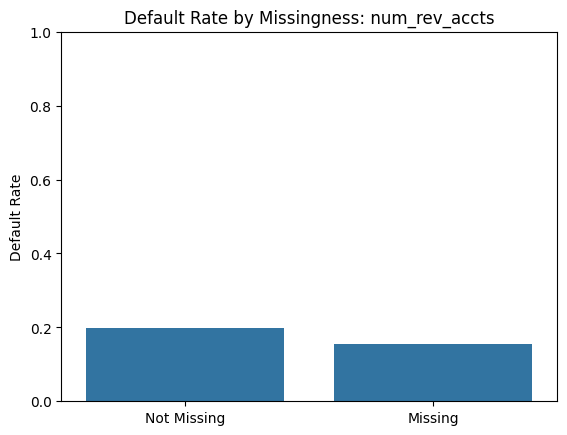


Column: pct_tl_nvr_dlq
  Default rate when NOT missing (missing=0): 0.1982
  Default rate when missing (missing=1): 0.1552



Column: percent_bc_gt_75
  Default rate when NOT missing (missing=0): 0.1977
  Default rate when missing (missing=1): 0.1580


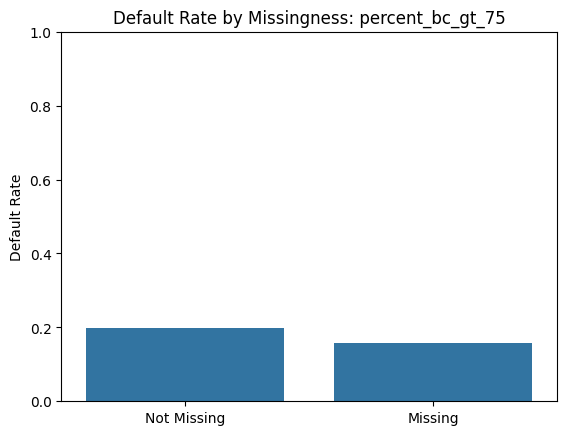


Column: pub_rec_bankruptcies
  Default rate when NOT missing (missing=0): 0.1955
  Default rate when missing (missing=1): 0.1610


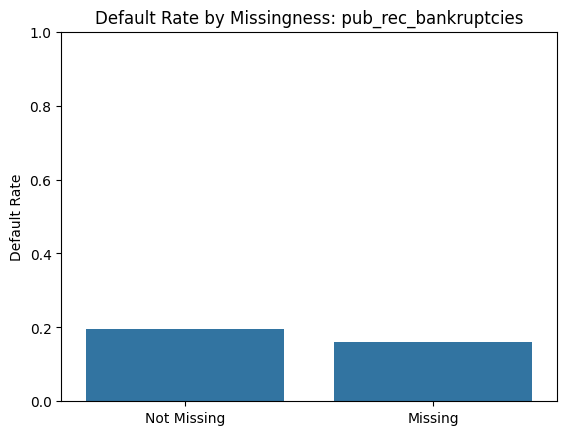


Column: tot_hi_cred_lim
  Default rate when NOT missing (missing=0): 0.1982
  Default rate when missing (missing=1): 0.1552



Column: total_bal_ex_mort
  Default rate when NOT missing (missing=0): 0.1978
  Default rate when missing (missing=1): 0.1469



Column: total_bc_limit
  Default rate when NOT missing (missing=0): 0.1978
  Default rate when missing (missing=1): 0.1469



Column: total_il_high_credit_limit
  Default rate when NOT missing (missing=0): 0.1982
  Default rate when missing (missing=1): 0.1552


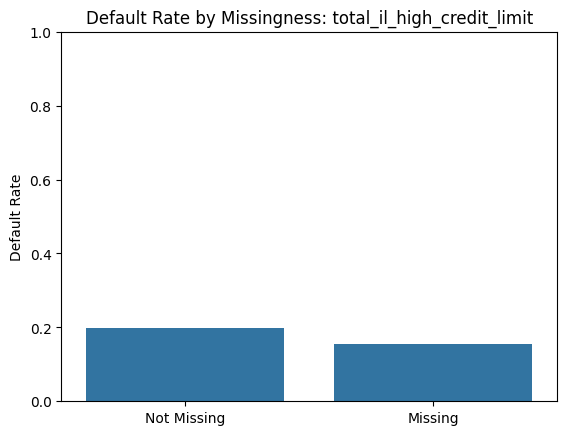

In [ ]:
# Compare default rates: missing vs non-missing

cols_with_missing = [col for col in data.columns if data[col].isnull().any()]

for col in cols_with_missing:
    # Create indicator: 1 if missing, 0 if not
    indicator = data[col].isnull().astype(int)
    df2 = pd.DataFrame({
        'missing': indicator,
        'default': data['default']
    })
    rates = df2.groupby('missing')['default'].mean()
    print(f"\nColumn: {col}")
    print(f"  Default rate when NOT missing (missing=0): {rates.get(0, float('nan')):.4f}")
    print(f"  Default rate when missing (missing=1): {rates.get(1, float('nan')):.4f}")

    # Optional: bar plot to visualize
    sns.barplot(x=['Not Missing', 'Missing'],
                y=[rates.get(0, float('nan')), rates.get(1, float('nan'))])
    plt.title(f"Default Rate by Missingness: {col}")
    plt.ylabel('Default Rate')
    plt.ylim(0, 1)
    plt.show()

### **iiI. Chi-Square Test for Missingness and Default**

In [ ]:
# Identify columns with missing values
cols_with_missing = data.isnull().sum()[data.isnull().sum() > 0].index.tolist()

# Perform Chi-Square test for each column with missing values against 'default'
print("Chi-Square Test Results (Missingness vs. Default):")
for col in cols_with_missing:
    # Create a contingency table of missingness (Yes/No) and default (0/1)
    contingency_table = pd.crosstab(data[col].isnull(), data['default'])

    # Perform the Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"\nColumn: {col}")
    print(f"  Chi-Square Statistic: {chi2:.4f}")
    print(f"  P-value: {p:.4f}")
    print(f"  Degrees of Freedom: {dof}")

    # Interpret the p-value
    alpha = 0.05
    if p < alpha:
        print(f"  Conclusion: Reject null hypothesis. There is a significant association between missingness in '{col}' and default.")
    else:
        print(f"  Conclusion: Fail to reject null hypothesis. There is no significant association between missingness in '{col}' and default.")

    display(contingency_table) # Display the contingency table for context

Chi-Square Test Results (Missingness vs. Default):

Column: dti
  Chi-Square Statistic: 0.7608
  P-value: 0.3831
  Degrees of Freedom: 1
  Conclusion: Fail to reject null hypothesis. There is no significant association between missingness in 'dti' and default.


default       0      1
dti                   
False    256411  62307
True        215     60


Column: revol_util
  Chi-Square Statistic: 0.9857
  P-value: 0.3208
  Degrees of Freedom: 1
  Conclusion: Fail to reject null hypothesis. There is no significant association between missingness in 'revol_util' and default.


default          0      1
revol_util               
False       256411  62306
True           215     61


Column: total_rev_hi_lim
  Chi-Square Statistic: 221.4251
  P-value: 0.0000
  Degrees of Freedom: 1
  Conclusion: Reject null hypothesis. There is a significant association between missingness in 'total_rev_hi_lim' and default.


default                0      1
total_rev_hi_lim               
False             239624  59243
True               17002   3124


Column: acc_open_past_24mths
  Chi-Square Statistic: 220.5269
  P-value: 0.0000
  Degrees of Freedom: 1
  Conclusion: Reject null hypothesis. There is a significant association between missingness in 'acc_open_past_24mths' and default.


default                    0      1
acc_open_past_24mths               
False                 244649  60305
True                   11977   2062


Column: mo_sin_old_il_acct
  Chi-Square Statistic: 41.7726
  P-value: 0.0000
  Degrees of Freedom: 1
  Conclusion: Reject null hypothesis. There is a significant association between missingness in 'mo_sin_old_il_acct' and default.


default                  0      1
mo_sin_old_il_acct               
False               232451  57014
True                 24175   5353


Column: mo_sin_old_rev_tl_op
  Chi-Square Statistic: 221.4251
  P-value: 0.0000
  Degrees of Freedom: 1
  Conclusion: Reject null hypothesis. There is a significant association between missingness in 'mo_sin_old_rev_tl_op' and default.


default                    0      1
mo_sin_old_rev_tl_op               
False                 239624  59243
True                   17002   3124


Column: mo_sin_rcnt_rev_tl_op
  Chi-Square Statistic: 221.4251
  P-value: 0.0000
  Degrees of Freedom: 1
  Conclusion: Reject null hypothesis. There is a significant association between missingness in 'mo_sin_rcnt_rev_tl_op' and default.


default                     0      1
mo_sin_rcnt_rev_tl_op               
False                  239624  59243
True                    17002   3124


Column: mo_sin_rcnt_tl
  Chi-Square Statistic: 221.4251
  P-value: 0.0000
  Degrees of Freedom: 1
  Conclusion: Reject null hypothesis. There is a significant association between missingness in 'mo_sin_rcnt_tl' and default.


default              0      1
mo_sin_rcnt_tl               
False           239624  59243
True             17002   3124


Column: mort_acc
  Chi-Square Statistic: 220.5269
  P-value: 0.0000
  Degrees of Freedom: 1
  Conclusion: Reject null hypothesis. There is a significant association between missingness in 'mort_acc' and default.


default        0      1
mort_acc               
False     244649  60305
True       11977   2062


Column: mths_since_recent_bc
  Chi-Square Statistic: 172.8496
  P-value: 0.0000
  Degrees of Freedom: 1
  Conclusion: Reject null hypothesis. There is a significant association between missingness in 'mths_since_recent_bc' and default.


default                    0      1
mths_since_recent_bc               
False                 242008  59645
True                   14618   2722


Column: num_actv_bc_tl
  Chi-Square Statistic: 221.4251
  P-value: 0.0000
  Degrees of Freedom: 1
  Conclusion: Reject null hypothesis. There is a significant association between missingness in 'num_actv_bc_tl' and default.


default              0      1
num_actv_bc_tl               
False           239624  59243
True             17002   3124


Column: num_actv_rev_tl
  Chi-Square Statistic: 221.4251
  P-value: 0.0000
  Degrees of Freedom: 1
  Conclusion: Reject null hypothesis. There is a significant association between missingness in 'num_actv_rev_tl' and default.


default               0      1
num_actv_rev_tl               
False            239624  59243
True              17002   3124


Column: num_bc_tl
  Chi-Square Statistic: 221.4251
  P-value: 0.0000
  Degrees of Freedom: 1
  Conclusion: Reject null hypothesis. There is a significant association between missingness in 'num_bc_tl' and default.


default         0      1
num_bc_tl               
False      239624  59243
True        17002   3124


Column: num_il_tl
  Chi-Square Statistic: 221.4251
  P-value: 0.0000
  Degrees of Freedom: 1
  Conclusion: Reject null hypothesis. There is a significant association between missingness in 'num_il_tl' and default.


default         0      1
num_il_tl               
False      239624  59243
True        17002   3124


Column: num_op_rev_tl
  Chi-Square Statistic: 221.4251
  P-value: 0.0000
  Degrees of Freedom: 1
  Conclusion: Reject null hypothesis. There is a significant association between missingness in 'num_op_rev_tl' and default.


default             0      1
num_op_rev_tl               
False          239624  59243
True            17002   3124


Column: num_rev_accts
  Chi-Square Statistic: 221.4251
  P-value: 0.0000
  Degrees of Freedom: 1
  Conclusion: Reject null hypothesis. There is a significant association between missingness in 'num_rev_accts' and default.


default             0      1
num_rev_accts               
False          239624  59243
True            17002   3124


Column: pct_tl_nvr_dlq
  Chi-Square Statistic: 222.5896
  P-value: 0.0000
  Degrees of Freedom: 1
  Conclusion: Reject null hypothesis. There is a significant association between missingness in 'pct_tl_nvr_dlq' and default.


default              0      1
pct_tl_nvr_dlq               
False           239584  59237
True             17042   3130


Column: percent_bc_gt_75
  Chi-Square Statistic: 167.5594
  P-value: 0.0000
  Degrees of Freedom: 1
  Conclusion: Reject null hypothesis. There is a significant association between missingness in 'percent_bc_gt_75' and default.


default                0      1
percent_bc_gt_75               
False             241719  59570
True               14907   2797


Column: pub_rec_bankruptcies
  Chi-Square Statistic: 1.3436
  P-value: 0.2464
  Degrees of Freedom: 1
  Conclusion: Fail to reject null hypothesis. There is no significant association between missingness in 'pub_rec_bankruptcies' and default.


default                    0      1
pub_rec_bankruptcies               
False                 256454  62334
True                     172     33


Column: tot_hi_cred_lim
  Chi-Square Statistic: 221.4251
  P-value: 0.0000
  Degrees of Freedom: 1
  Conclusion: Reject null hypothesis. There is a significant association between missingness in 'tot_hi_cred_lim' and default.


default               0      1
tot_hi_cred_lim               
False            239624  59243
True              17002   3124


Column: total_bal_ex_mort
  Chi-Square Statistic: 220.5269
  P-value: 0.0000
  Degrees of Freedom: 1
  Conclusion: Reject null hypothesis. There is a significant association between missingness in 'total_bal_ex_mort' and default.


default                 0      1
total_bal_ex_mort               
False              244649  60305
True                11977   2062


Column: total_bc_limit
  Chi-Square Statistic: 220.5269
  P-value: 0.0000
  Degrees of Freedom: 1
  Conclusion: Reject null hypothesis. There is a significant association between missingness in 'total_bc_limit' and default.


default              0      1
total_bc_limit               
False           244649  60305
True             11977   2062


Column: total_il_high_credit_limit
  Chi-Square Statistic: 221.4251
  P-value: 0.0000
  Degrees of Freedom: 1
  Conclusion: Reject null hypothesis. There is a significant association between missingness in 'total_il_high_credit_limit' and default.


default                          0      1
total_il_high_credit_limit               
False                       239624  59243
True                         17002   3124

***OBSERVATION***

* The nan category in emp_length is not being identified as missing even though it's unknown.

* Additionally, msno matrix shows scattered white lines representing missing values patterns between the columns with missing data, suggesting that the missingness is likely not random.

* From our chi_square test, there is a significant association between missingness in those credit variables and default. Will likely create a missingness flag.

* The distributions are mostly right skewed, which means median imputation will be better as it's more robust to outliers than mean. Further analysis will be done on the train set to determine the best method of imputation after splitting the data.

In [ ]:
# List of features with exactly 20,126 missing values
credit_block_cols = [
    'total_rev_hi_lim',
    'mo_sin_old_rev_tl_op',
    'mo_sin_rcnt_rev_tl_op',
    'mo_sin_rcnt_tl',
    'num_actv_bc_tl',
    'num_actv_rev_tl',
    'num_bc_tl',
    'num_il_tl',
    'num_op_rev_tl',
    'num_rev_accts',
    'tot_hi_cred_lim',
    'total_il_high_credit_limit'
]

# Create the binary indicator
data['missing_credit_block'] = data[credit_block_cols].isnull().all(axis=1).astype(int)


A group of 20,126 records was identified with consistent missingness across a block of credit bureau-derived features. Chi-square tests performed on this group yielded p-values less than 0.05, indicating that the missingness pattern is statistically significantly associated with the target variable. While such missingness often corresponds to thin-file or new-to-credit applicants, the default rate in this group was 15.5%, lower than the dataset-wide default rate of 19.6%. This suggests that missing credit data does not necessarily indicate higher credit risk in this context. To enable the model to capture any latent patterns linked to this structured missingness, a binary indicator variable was created for this group.

_

## **6. OUTLIER DETECTION**

### **i. Visualizing Outliers with Box Plots**

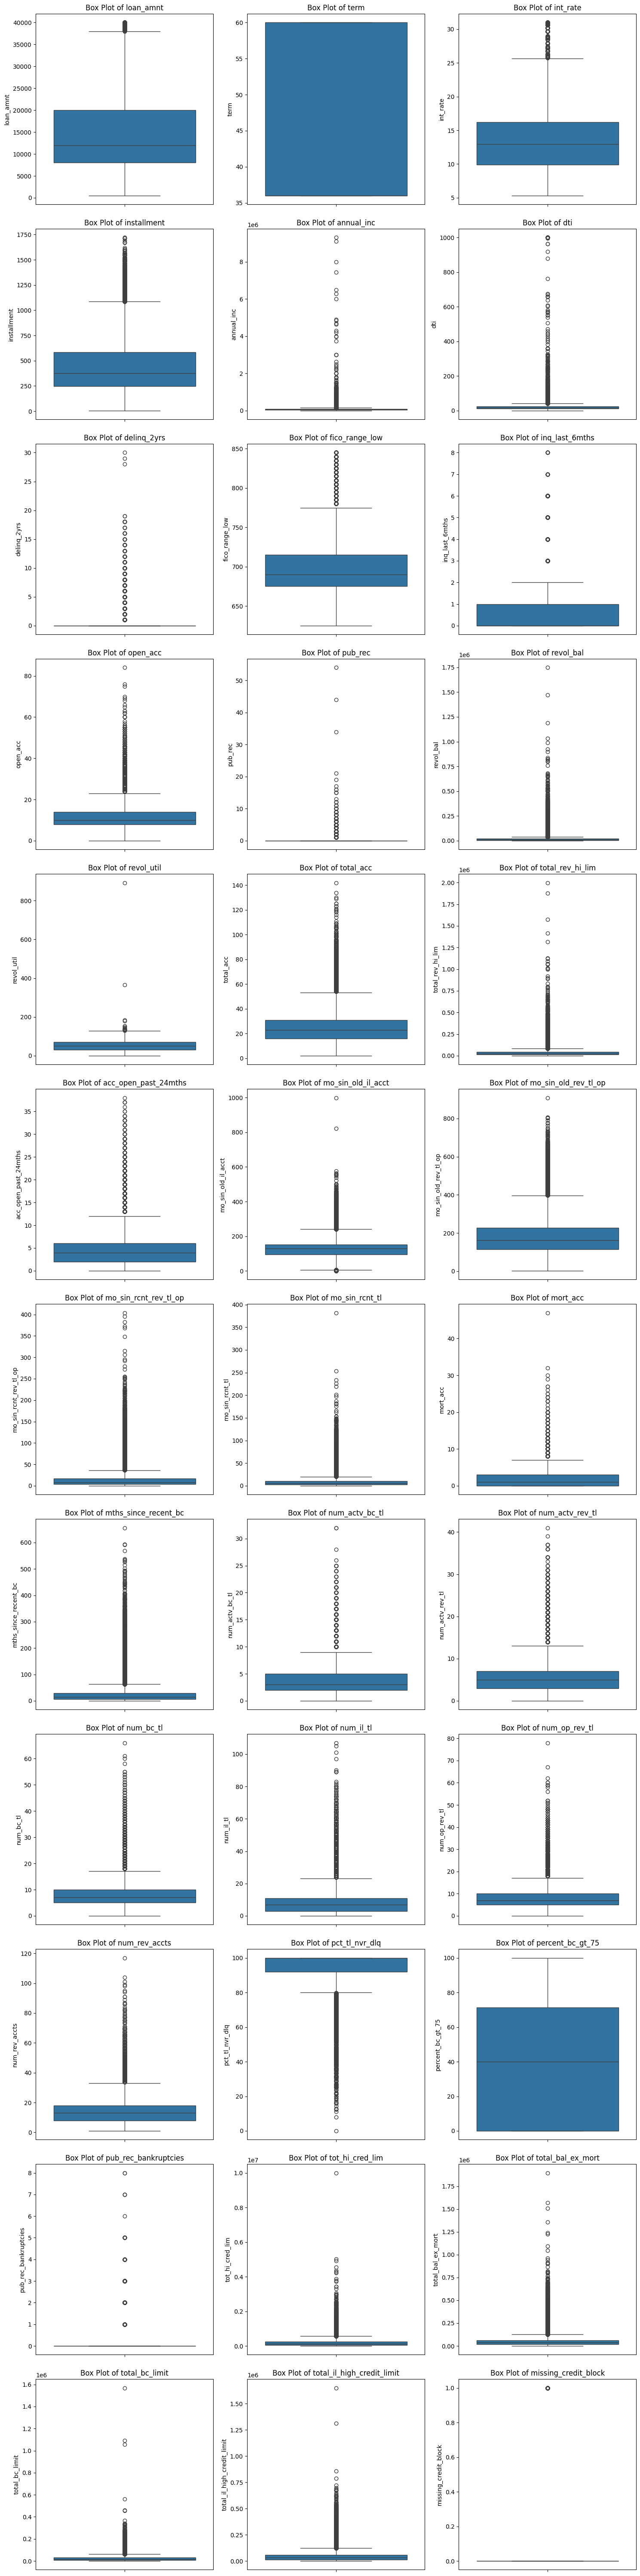

In [ ]:
# Identify numerical columns (excluding date columns and 'default')
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
if 'default' in numerical_cols:
    numerical_cols.remove('default')

# Determine the number of rows and columns for subplots
n_cols_num = 3
n_rows_num = (len(numerical_cols) + n_cols_num - 1) // n_cols_num

# Create subplots for numerical variables
fig_num, axes_num = plt.subplots(n_rows_num, n_cols_num, figsize=(15, n_rows_num * 5))
axes_num = axes_num.flatten() # Flatten the axes array

# Create box plots for numerical columns
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=data, y=col, ax=axes_num[i])
    axes_num[i].set_title(f'Box Plot of {col}')
    axes_num[i].set_ylabel(col)


# Hide any unused subplots
for j in range(i + 1, len(axes_num)):
    fig_num.delaxes(axes_num[j])

plt.tight_layout()
plt.show()

_

### **ii. Identifying Outliers using IQR**

In [ ]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

outlier_summary = []

print("Identifying Outliers using IQR:")
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    outlier_summary.append({
        'Column': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound (Q1 - 1.5*IQR)': lower_bound,
        'Upper Bound (Q3 + 1.5*IQR)': upper_bound,
        'Number of Outliers': len(outliers),
        'Percentage of Outliers': (len(outliers) / len(data)) * 100
    })

# Display the outlier summary as a DataFrame
outlier_summary_df = pd.DataFrame(outlier_summary)
display(outlier_summary_df)

Identifying Outliers using IQR:


Column        Q1         Q3        IQR  \
0                    loan_amnt   8000.00   20000.00   12000.00   
1                         term     36.00      60.00      24.00   
2                     int_rate      9.92      16.24       6.32   
3                  installment    248.82     584.37     335.55   
4                   annual_inc  45350.00   91000.00   45650.00   
5                          dti     11.49      23.90      12.41   
6                  delinq_2yrs      0.00       0.00       0.00   
7               fico_range_low    675.00     715.00      40.00   
8               inq_last_6mths      0.00       1.00       1.00   
9                     open_acc      8.00      14.00       6.00   
10                     pub_rec      0.00       0.00       0.00   
11                   revol_bal   5728.00   19658.00   13930.00   
12                  revol_util     30.60      69.70      39.10   
13                   total_acc     16.00      31.00      15.00   
14            total_rev_hi_lim  14500.00   42500.00   28000.00   
15        acc_open_past_24mths      2.00       6.00       4.00   
16          mo_sin_old_il_acct     94.00     153.00      59.00   
17        mo_sin_old_rev_tl_op    115.00     228.00     113.00   
18       mo_sin_rcnt_rev_tl_op      4.00      17.00      13.00   
19              mo_sin_rcnt_tl      3.00      10.00       7.00   
20                    mort_acc      0.00       3.00       3.00   
21        mths_since_recent_bc      6.00      29.00      23.00   
22              num_actv_bc_tl      2.00       5.00       3.00   
23             num_actv_rev_tl      3.00       7.00       4.00   
24                   num_bc_tl      5.00      10.00       5.00   
25                   num_il_tl      3.00      11.00       8.00   
26               num_op_rev_tl      5.00      10.00       5.00   
27               num_rev_accts      8.00      18.00      10.00   
28              pct_tl_nvr_dlq     92.00     100.00       8.00   
29            percent_bc_gt_75      0.00      71.40      71.40   
30        pub_rec_bankruptcies      0.00       0.00       0.00   
31             tot_hi_cred_lim  50400.00  259100.00  208700.00   
32           total_bal_ex_mort  20281.00   62596.00   42315.00   
33              total_bc_limit   8100.00   30000.00   21900.00   
34  total_il_high_credit_limit  14400.00   57346.00   42946.00   
35                     default      0.00       0.00       0.00   
36        missing_credit_block      0.00       0.00       0.00   

    Lower Bound (Q1 - 1.5*IQR)  Upper Bound (Q3 + 1.5*IQR)  \
0                   -10000.000                   38000.000   
1                        0.000                      96.000   
2                        0.440                      25.720   
3                     -254.505                    1087.695   
4                   -23125.000                  159475.000   
5                       -7.125                      42.515   
6                        0.000                       0.000   
7                      615.000                     775.000   
8                       -1.500                       2.500   
9                       -1.000                      23.000   
10                       0.000                       0.000   
11                  -15167.000                   40553.000   
12                     -28.050                     128.350   
13                      -6.500                      53.500   
14                  -27500.000                   84500.000   
15                      -4.000                      12.000   
16                       5.500                     241.500   
17                     -54.500                     397.500   
18                     -15.500                      36.500   
19                      -7.500                      20.500   
20                      -4.500                       7.500   
21                     -28.500                      63.500   
22                      -2.500                       9.500   
23                      -3.

_

### **iii. Individual variable Outlier investigation with domain knowledge**

In [ ]:
# Function to plot distribution and show outliers

def plot_distribution_and_boxplot(data, column):
    """
    Plots the distribution (histogram with KDE) and box plot of a numerical column side by side.

    Args:
        data (pd.DataFrame): The input DataFrame.
        column (str): The name of the numerical column to plot.
    """
    # Check if the column is numerical
    if data[column].dtype not in ['int64', 'float64']:
        print(f"Error: Column '{column}' is not a numerical column.")
        return

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot histogram with KDE
    sns.histplot(data=data, x=column, kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # Plot box plot
    sns.boxplot(data=data, y=column, ax=axes[1])
    axes[1].set_title(f'Box Plot of {column}')
    axes[1].set_ylabel(column)

    plt.tight_layout()
    plt.show()

In [ ]:
# Function to calculate IQR

def IQR(series):
    """
    Calculates and prints the Interquartile Range (IQR) and outlier bounds for a pandas Series.

    Args:
        series (pd.Series): The input pandas Series.
    """
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR_value = Q3 - Q1 # Renamed variable to avoid conflict with function name
    lower_bound = Q1 - 1.5 * IQR_value
    upper_bound = Q3 + 1.5 * IQR_value

    print(f"Column: {series.name}") # Print the column name
    print(f"  Q1: {Q1:.4f}")
    print(f"  Q3: {Q3:.4f}")
    print(f"  IQR: {IQR_value:.4f}")
    print(f"  Lower Bound (Q1 - 1.5*IQR): {lower_bound:.4f}")
    print(f"  Upper Bound (Q3 + 1.5*IQR): {upper_bound:.4f}")

In [ ]:
# Function to check the 99th percentile and above

def check_99th_percentile_and_above(series):
    """
    Calculates and prints the 99th percentile and the count/percentage of values above it.

    Args:
        series (pd.Series): The input pandas Series (numerical column).
    """
    if series.dtype not in ['int64', 'float64']:
        print(f"Error: Column '{series.name}' is not a numerical column.")
        return

    # Calculate the 99th percentile
    percentile_99 = series.quantile(0.99)

    # Count values exceeding the 99th percentile
    count_above_99th = (series > percentile_99).sum()
    total_count = series.shape[0]
    percentage_above_99th = (count_above_99th / total_count) * 100

    print(f"Column: {series.name}")
    print(f"  99th Percentile: {percentile_99:.4f}")
    print(f"  Count above 99th Percentile: {count_above_99th}")
    print(f"  Percentage above 99th Percentile: {percentage_above_99th:.4f}%")

_

##### **a. LOAN AMOUNT**

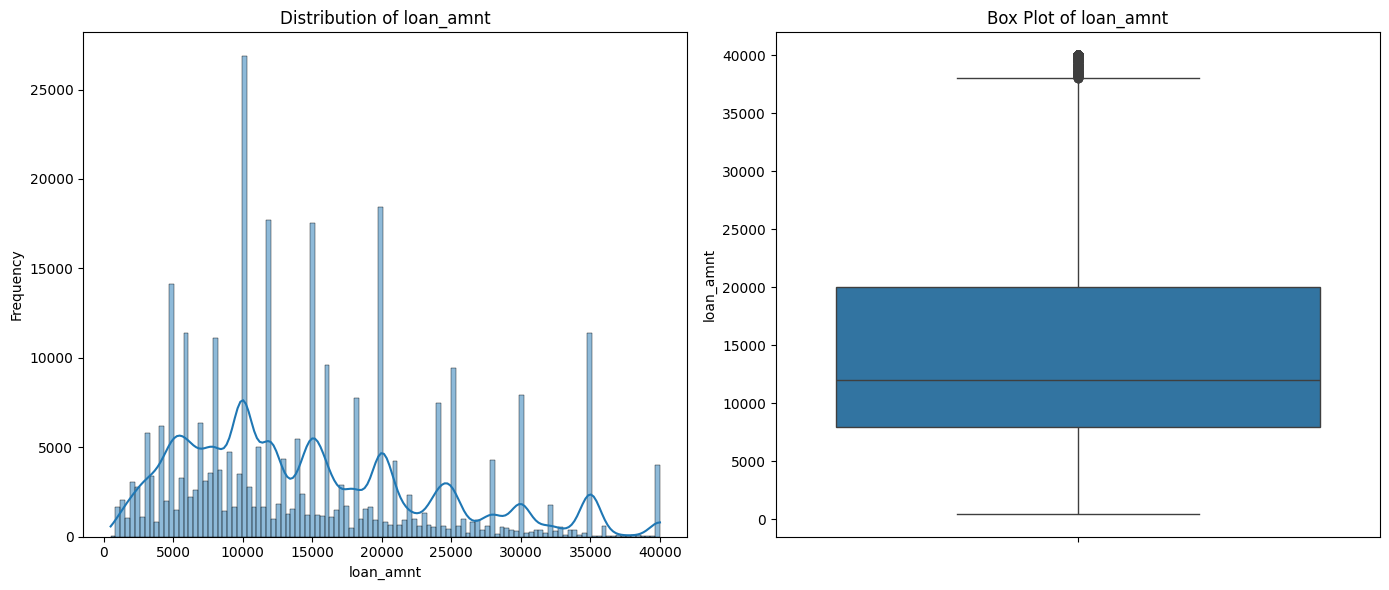

In [ ]:
plot_distribution_and_boxplot(data, 'loan_amnt')

In [ ]:
IQR(data['loan_amnt'])

Column: loan_amnt
  Q1: 8000.0000
  Q3: 20000.0000
  IQR: 12000.0000
  Lower Bound (Q1 - 1.5*IQR): -10000.0000
  Upper Bound (Q3 + 1.5*IQR): 38000.0000


In [ ]:
check_99th_percentile_and_above(data['loan_amnt'])

Column: loan_amnt
  99th Percentile: 40000.0000
  Count above 99th Percentile: 0
  Percentage above 99th Percentile: 0.0000%


***DOMAIN KNOWLEDGE***

Loan amount (1k to 60k dollars) [lending_club_loan_amount](https://www.lendingclub.com/help/personal-loan-faq/how-much-can-i-borrow?utm_source=chatgpt.com) and interest rates (7.90 to 35.99 percentage) [lending_club_interest_rate](https://www.businessinsider.com/personal-finance/personal-loans/lendingclub-personal-loans-review?utm_source=chatgpt.com) outliers are real  values, just rear. Same goes for fico_score, inq_last_6mths, pub_rec, and delinq_2yrs.

For delinq_2yrs, can create a binary variable (>0 is 1, and 0 is 0), same for pub_rec, and pub_rec_bankruptcies.

_

#### **b. ANNUAL INCOME**

In [ ]:
plot_distribution_and_boxplot(data, 'annual_inc')

In [ ]:
IQR(data['annual_inc'])

Column: annual_inc
  Q1: 45350.0000
  Q3: 91000.0000
  IQR: 45650.0000
  Lower Bound (Q1 - 1.5*IQR): -23125.0000
  Upper Bound (Q3 + 1.5*IQR): 159475.0000


In [ ]:
check_99th_percentile_and_above(data['annual_inc'])

Column: annual_inc
  99th Percentile: 260000.0000
  Count above 99th Percentile: 3080
  Percentage above 99th Percentile: 0.9655%


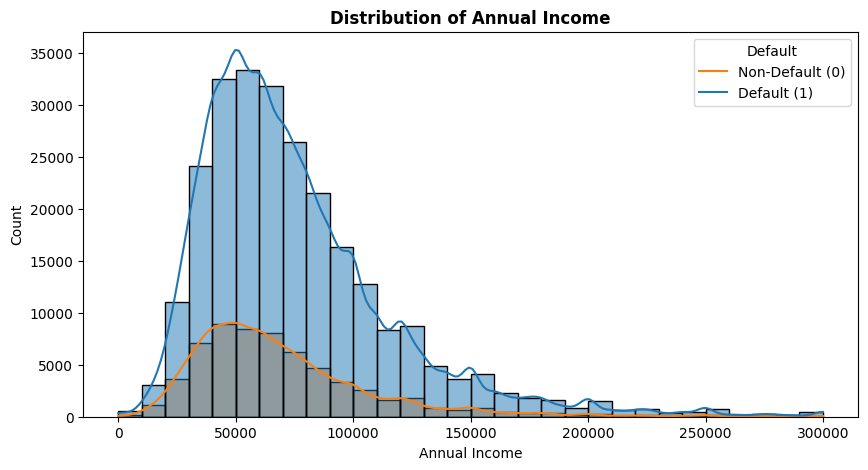

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x='annual_inc', hue='default', data=(data[((data['annual_inc'] <= 300000))]), bins=30, kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.legend(title='Default', labels=['Non-Default (0)', 'Default (1)'])
plt.title("Distribution of Annual Income",  fontweight='bold')
plt.show()

_

#### **c. INTEREST RATE**

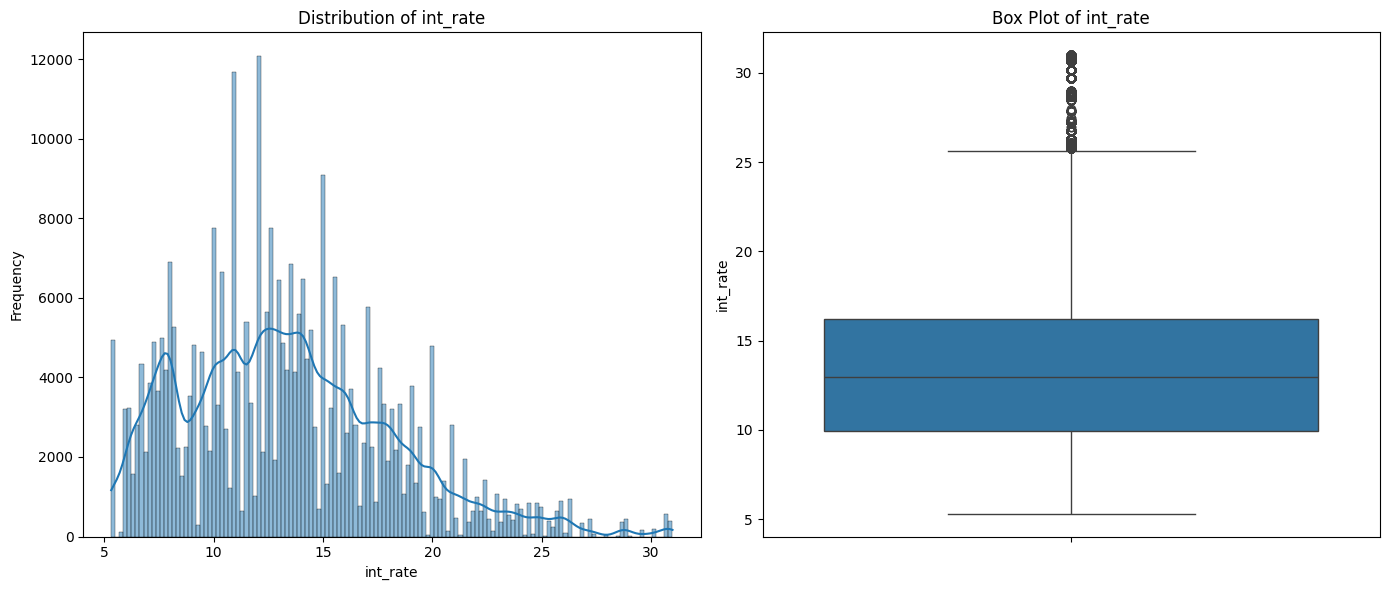

In [ ]:
plot_distribution_and_boxplot(data, 'int_rate')

In [ ]:
IQR(data['int_rate'])

Column: int_rate
  Q1: 9.9200
  Q3: 16.2400
  IQR: 6.3200
  Lower Bound (Q1 - 1.5*IQR): 0.4400
  Upper Bound (Q3 + 1.5*IQR): 25.7200


In [ ]:
check_99th_percentile_and_above(data['int_rate'])

Column: int_rate
  99th Percentile: 26.3100
  Count above 99th Percentile: 3095
  Percentage above 99th Percentile: 0.9702%


***DOMAIN KNOWLEDGE***

According to LendingClub, interest rates range from 7.90 to 35.99 [lending_club_interest_rate](https://www.businessinsider.com/personal-finance/personal-loans/lendingclub-personal-loans-review?utm_source=chatgpt.com). These outliers are real  values, just rear.

_

#### **d. DEBT-TO-INCOME RATIO**

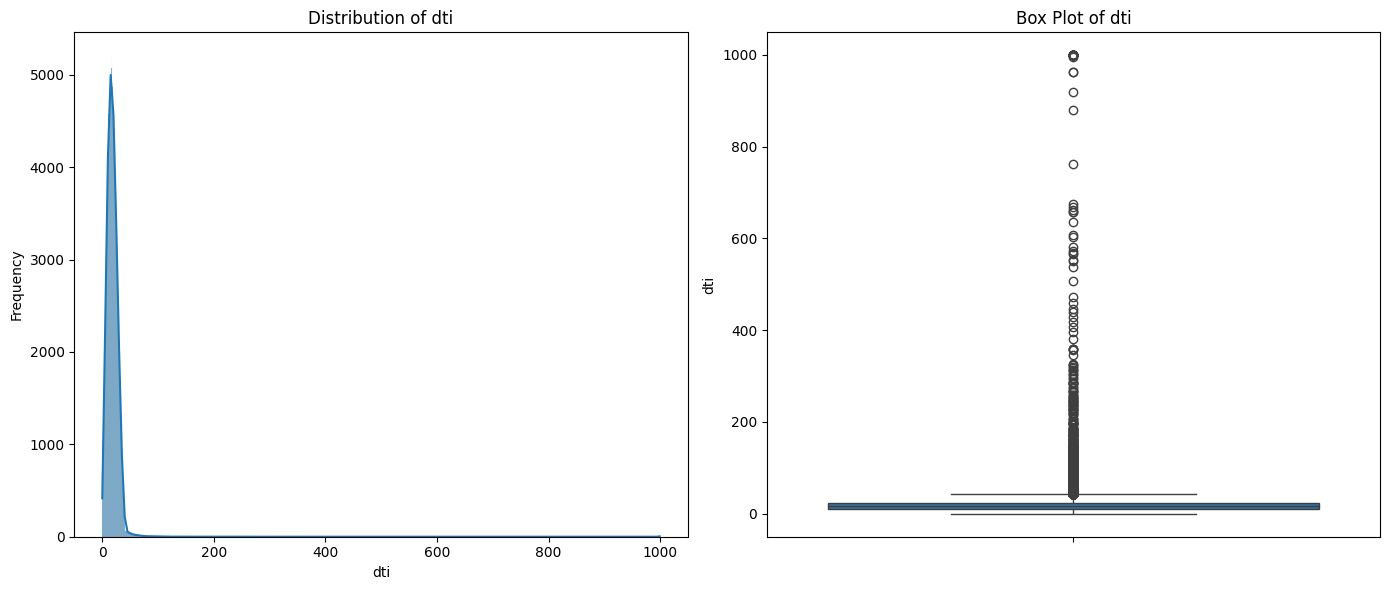

In [ ]:
plot_distribution_and_boxplot(data, 'dti')

In [ ]:
IQR(data['dti'])

Column: dti
  Q1: 11.4900
  Q3: 23.9000
  IQR: 12.4100
  Lower Bound (Q1 - 1.5*IQR): -7.1250
  Upper Bound (Q3 + 1.5*IQR): 42.5150


In [ ]:
check_99th_percentile_and_above(data['dti'])

Column: dti
  99th Percentile: 41.1600
  Count above 99th Percentile: 3186
  Percentage above 99th Percentile: 0.9988%


In [ ]:
# Filter data for loans with DTI > 60
high_dti_loans = data[data['dti'] > 50]

# Get the counts of default (1) and non-default (0) in this filtered group
default_counts_high_dti = high_dti_loans['default'].value_counts()

print("Default and Non-Default Counts for loans with DTI > 60:")
display(default_counts_high_dti)

Default and Non-Default Counts for loans with DTI > 60:


default
0    1364
1     579
Name: count, dtype: int64

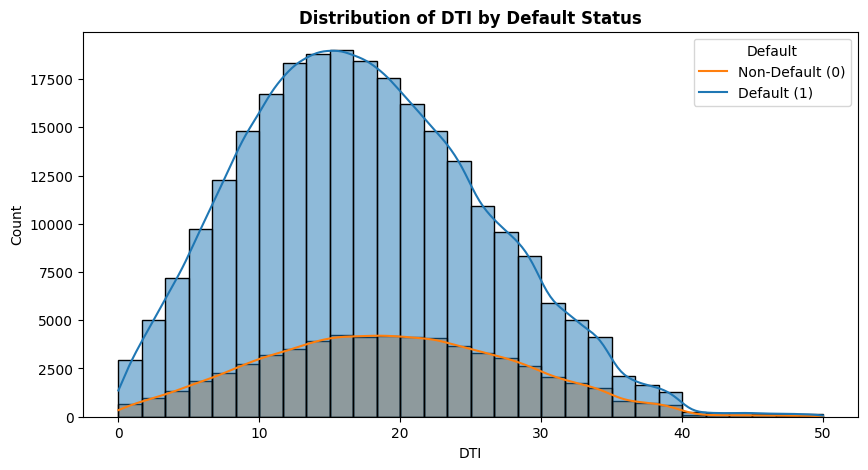

In [ ]:
plt.figure(figsize=(10, 5))
# Plot distribution of 'dti' by default status
sns.histplot(x='dti', hue='default', data=(data[((data['dti'] <= 50))]), bins=30, kde=True)
plt.xlabel('DTI') # Updated xlabel
plt.ylabel('Count')
plt.legend(title='Default', labels=['Non-Default (0)', 'Default (1)'])
plt.title("Distribution of DTI by Default Status",  fontweight='bold')
plt.show()

***DOMAIN KNOWLEDGE***

Most Lending clubs only approve loans with dti from 36% and below. Some reach 50%. [LendingClub_dti](https://www.lendingclub.com/glossary/d/debt-to-income-dti-ratio). This very high debt-to- income ratios are very unrealistic.




_

### **e. Revolving Balance**

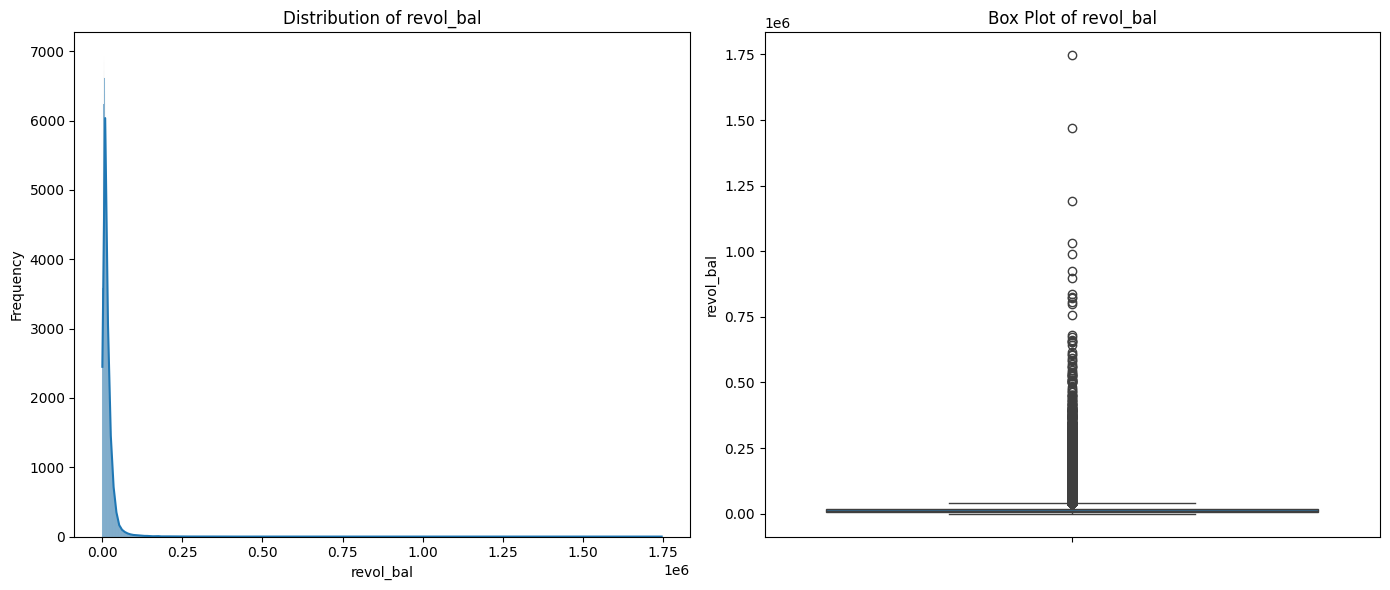

In [ ]:
plot_distribution_and_boxplot(data, 'revol_bal')

In [ ]:
IQR(data['revol_bal'])

Column: revol_bal
  Q1: 5728.0000
  Q3: 19658.0000
  IQR: 13930.0000
  Lower Bound (Q1 - 1.5*IQR): -15167.0000
  Upper Bound (Q3 + 1.5*IQR): 40553.0000


In [ ]:
check_99th_percentile_and_above(data['revol_bal'])

Column: revol_bal
  99th Percentile: 92386.5200
  Count above 99th Percentile: 3190
  Percentage above 99th Percentile: 1.0000%


In [ ]:
# Filter data for loans with revol_bal > 150,000
high_revol_bal_loans = data[data['revol_bal'] > 150000]

# Get the counts of default (1) and non-default (0) in this filtered group
default_counts_high_revol_bal = high_revol_bal_loans['default'].value_counts()

print("Default and Non-Default Counts for loans with revol_bal > 150000:")
display(default_counts_high_revol_bal)

Default and Non-Default Counts for loans with revol_bal > 150000:


default
0    1004
1     126
Name: count, dtype: int64

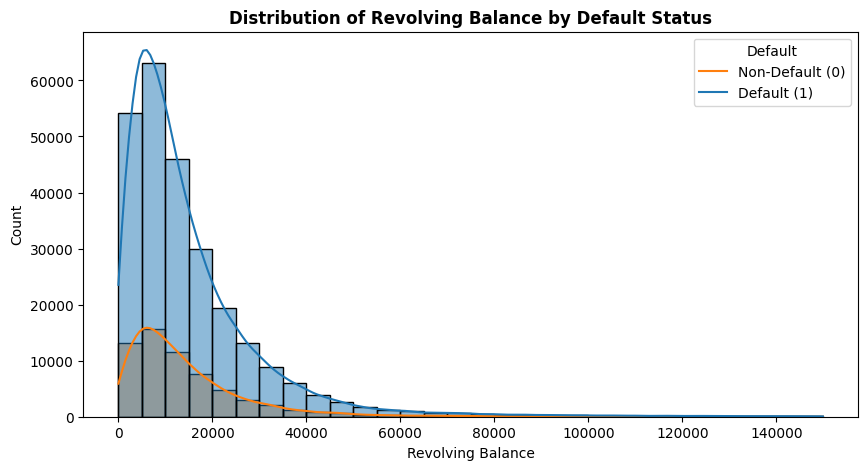

In [ ]:
plt.figure(figsize=(10, 5))
# Plot distribution of 'revol_bal' by default status
sns.histplot(x='revol_bal', hue='default', data=(data[((data['revol_bal'] <= 150000))]), bins=30, kde=True)
plt.xlabel('Revolving Balance') # Updated xlabel
plt.ylabel('Count')
plt.legend(title='Default', labels=['Non-Default (0)', 'Default (1)'])
plt.title("Distribution of Revolving Balance by Default Status",  fontweight='bold')
plt.show()

**SAVE AND DOWNLOAD THE DATA**

In [87]:
# Define the filename for the saved data
output_filename = '/content/drive/MyDrive/P2_data.csv'

# Save the DataFrame to a CSV file
data.to_csv(output_filename, index=False)

print(f"DataFrame saved to '{output_filename}'.")

DataFrame saved to '/content/drive/MyDrive/P2_data.csv'.
